In [1]:
import pandas as pd
import zipfile


In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df_ed_country = pd.read_csv("/content/drive/My Drive/Edstats_csv/EdStatsCountry.csv")
df_con_series = pd.read_csv("/content/drive/My Drive/Edstats_csv/EdStatsCountry-Series.csv")
df_ed_foo = pd.read_csv("/content/drive/My Drive/Edstats_csv/EdStatsFootNote.csv")
df_ed_series = pd.read_csv("/content/drive/My Drive/Edstats_csv/EdStatsSeries.csv")
df_ed_data = pd.read_csv("/content/drive/My Drive/Edstats_csv/EdStatsData.csv")
print("the shape of data df_ed_country is {}".format(df_ed_country.shape))
print("the shape of data df_con_series is {}".format(df_con_series.shape))
print("the shape of datadf_ed_foo is {}".format(df_ed_foo.shape))
print("the shape of data df_ed_series is {}".format(df_ed_series.shape))
print("the shape of data df_ed_data is {}".format(df_ed_data.shape))


the shape of data df_ed_country is (241, 32)
the shape of data df_con_series is (613, 4)
the shape of datadf_ed_foo is (643638, 5)
the shape of data df_ed_series is (3665, 21)
the shape of data df_ed_data is (886930, 70)


In [27]:
df_ed_country.head()


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [28]:
df_ed_country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [29]:
df_ed_country.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [30]:








df_ed_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [31]:
df_ed_country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [32]:
df_ed_country.drop_duplicates()
df_ed_country.shape

(241, 32)

In [33]:
df_con_series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [34]:
df_con_series.isnull().sum()

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [35]:

df_ed_foo.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [36]:
df_ed_foo.isnull().sum()

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

In [37]:

df_ed_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_ed_data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

In [39]:
df_ed_data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [40]:
#https://pypi.org/project/world-bank-data/
#https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata
#https://www.kaggle.com/paultimothymooney/how-to-query-the-world-bank-education-data/data?select=series_summary
#https://datatopics.worldbank.org/education/
#https://ibm.ent.box.com/s/xo7ipkvd60a52q2rq6hirng439132b7e

In [41]:
!pip install -U wbdata
#https://wbdata.readthedocs.io/en/latest/
#https://github.com/OliverSherouse/wbdata
#https://data.worldbank.org/country
#https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

Requirement already up-to-date: wbdata in /usr/local/lib/python3.6/dist-packages (0.3.0)


##find the sources/data provided by world bank 


In [42]:
import wbdata                                                                 
wbdata.get_source()                                                           

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

##The source required for this project 

In [43]:
wbdata.get_source(12)
#the source required for this project 

  id  name
----  --------------------
  12  Education Statistics

## Finding the list of countries available in world bank data

In [157]:
#wbdata.get_country()


##Getting the indicator for the selected source in this case which is education

In [156]:
#wbdata.get_indicator(source=12)

In [46]:
import matplotlib.pyplot as plt
#https://data.worldbank.org/indicator


##list contaning which are non countries in the world bank data

In [47]:
#this list contains the non countries names in the world banck data 
lis=['World', 'IDA & IBRD total', 'Low & middle income', 'Middle income',
       'IBRD only', 'Early-demographic dividend', 'Lower middle income',
       'Upper middle income', 'Late-demographic dividend',
       'East Asia & Pacific', 'South Asia', 'South Asia (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'OECD members', 'China',
       'IDA total', 'High income', 'Post-demographic dividend',
       'Europe & Central Asia', 'Latin America & Caribbean',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Latin America & Caribbean (excluding high income)', 'IDA only',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
       'Sub-Saharan Africa (excluding high income)',
       'Least developed countries: UN classification',
       'Pre-demographic dividend', 'Middle East & North Africa',
       'European Union', 'Europe & Central Asia (IDA & IBRD countries)',
       'Low income', 'Heavily indebted poor countries (HIPC)',
       'Europe & Central Asia (excluding high income)',
       'Middle East & North Africa (excluding high income)', 'IDA blend',
       'Arab World', 'Middle East & North Africa (IDA & IBRD countries)',
       'North America', 'Fragile and conflict affected situations','Other small states','Euro area','Small states','Caribbean small states','Pacific island small states','Not classified']
len(lis)

47

##list used to drop ohter yeas and inclusing only 2009 - 20019

In [48]:
#list used to drop ohter yeas and inclusing only 2009 - 20019 
years = ['1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009','2020']

##The following indicators which include the secondary or high school students of all countries . it includes the internet conectivity of the countries  student teacher ratio , number of teachers in secondary or high school , number of ppl enroled in secondary school private and govt expendeture on these  education and secondary education.



In [68]:
indicators = {'SE.SEC.PRIV.ZS':'School enrollment, secondary, private (% of total secondary)','SE.SEC.TCHR':'Secondary education, teachers','SE.SEC.ENRL.TC.ZS':'Pupil-teacher ratio, secondary','SE.SEC.ENRL.GC':'Secondary education, general pupils','IT.NET.SECR.P6':'Secure Internet servers (per 1 million people)','SE.XPD.TOTL.GB.ZS':'Government expenditure on education, total (% of government expenditure)','SE.XPD.CSEC.ZS':'Expenditure on secondary education (% of government expenditure on education)'}

In [69]:
# chosing list of indicaters to perform analysis on secondary students or high school 
private_enroll_ind= {'SE.SEC.PRIV.ZS':'School enrollment, secondary, private (% of total secondary)'} # number of people joined in private institution 
sec_ed_techer_ind = {'SE.SEC.TCHR':'Secondary education, teachers'} #how many secondary school teachers are their
pupil_teach_ratio_ind = {'SE.SEC.ENRL.TC.ZS':'Pupil-teacher ratio, secondary'} # student teaher ratio 
sec_ed_pupil_ind = {'SE.SEC.ENRL.GC':'Secondary education, general pupils'}#Secondary general pupils are the number of secondary students enrolled in general education programs, including teacher training.; ; UNESCO Institute for Statistics (http://uis.unesco.org/).
internet_ind = {'IT.NET.SECR.P6':'Secure Internet servers (per 1 million people)'} #ppl have internet 
govt_exp_ind = {'SE.XPD.TOTL.GB.ZS':'Government expenditure on education, total (% of government expenditure)'} 
govt_exp_sec_ind = {'SE.XPD.CSEC.ZS':'Expenditure on secondary education (% of government expenditure on education)'}
#talking in acocunt of last 10 years of data from 2009 - 2019


In [51]:
wbdata.get_data
df = wbdata.get_dataframe(private_enroll_ind, country='all',convert_date=False )
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0).transpose()

#talking in acocunt of last 10 years of data from 2009 - 2019
df_private_enrollment_sec = dfu.drop(years,axis=1)
#df_sec_teacher.head()
df_private_enrollment_sec.reset_index(inplace=True)
df_private_enrollment_sec.set_index('country',inplace=True)
df_private_enrollment_sec.drop(lis,axis=0,inplace=True)
print(df_private_enrollment_sec.shape)
df_private_enrollment_sec.head()



(217, 11)


date,level_0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,
Afghanistan,"School enrollment, secondary, private (% of to...",NaN,1.27354,1.94761,NaN,1.97750,2.72148,3.42164,3.71601,4.45812,NaN
Albania,"School enrollment, secondary, private (% of to...",6.14436,6.61480,7.25773,7.76118,8.26905,NaN,NaN,NaN,8.79378,9.46296
Algeria,"School enrollment, secondary, private (% of to...",0.07714,0.27140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
American Samoa,"School enrollment, secondary, private (% of to...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,"School enrollment, secondary, private (% of to...",2.04484,NaN,2.49525,2.40623,2.17643,2.84414,2.77966,2.82725,3.05783,3.04357


In [52]:
df_private_enrollment_sec.describe()

date,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,128.000000,135.000000,131.000000,129.000000,134.000000,140.000000,135.000000,127.000000,124.000000,60.000000
mean,18.493031,18.200671,18.860263,19.540468,19.232638,19.267528,18.308348,19.160484,18.400744,21.586068
std,19.442215,18.708841,20.417369,19.620332,18.536034,19.054853,18.242081,19.542891,18.092926,21.717558
min,0.000000,0.271400,0.000000,0.013610,0.040780,0.036650,0.054370,0.000000,0.088800,0.146230
25%,4.810178,4.859460,4.967800,6.466670,6.383042,6.575205,5.493835,6.925455,6.296278,7.012642
50%,13.469080,12.754460,13.305840,12.914070,13.312605,13.363640,12.936920,12.333600,11.967845,12.429205
75%,24.346840,25.595036,25.469814,26.121189,26.117618,26.751546,25.484816,25.024360,24.616373,26.552016
max,95.356079,95.347092,95.515869,95.542580,95.741562,95.951874,95.919289,96.061592,95.986168,96.253166


In [53]:
df_private_enrollment_sec.isnull().sum()

date
level_0      0
2010        89
2011        82
2012        86
2013        88
2014        83
2015        77
2016        82
2017        90
2018        93
2019       157
dtype: int64

In [54]:

#df_private_enrollment_sec['2015'].idxmax(axis=1,skipna=True)
df_private_enrollment_sec.sort_values(by=['2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],ascending=False,inplace=True)

print(df_private_enrollment_sec.shape)
df_country = pd.DataFrame(list(df_private_enrollment_sec.index), columns=['df_con_private_enrollment'])

print(df_private_enrollment_sec.index[:50])

(217, 11)
Index(['Macao SAR, China', 'Bangladesh', 'Aruba', 'Tonga', 'Belize',
       'Guatemala', 'Grenada', 'Lebanon', 'Chile', 'Belgium', 'Mauritius',
       'Bermuda', 'Burkina Faso', 'Indonesia', 'Qatar', 'Solomon Islands',
       'Ecuador', 'Mali', 'Korea, Rep.', 'Kuwait', 'Pakistan', 'Bahamas, The',
       'United Kingdom', 'Malta', 'Venezuela, RB', 'Dominica', 'Spain',
       'Mauritania', 'France', 'Timor-Leste', 'Argentina', 'Honduras',
       'Rwanda', 'St. Vincent and the Grenadines', 'Peru', 'Nicaragua',
       'Monaco', 'Paraguay', 'Dominican Republic', 'Nigeria', 'Puerto Rico',
       'Bahrain', 'Colombia', 'Senegal', 'New Zealand', 'Japan', 'Jordan',
       'Antigua and Barbuda', 'Luxembourg', 'Cyprus'],
      dtype='object', name='country')


# The above list indicates the country name in descending order according  to their private school enrolement secondary indicator,and the top 50 countries are displayed


In [55]:
wbdata.get_data
df = wbdata.get_dataframe(sec_ed_techer_ind, country='all' ,convert_date=False)
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0).transpose()
print(dfu.shape)
#talking in acocunt of last 10 years of data from 2009 - 2019
df_sec_teacher = dfu.drop(years,axis=1)
#df_sec_teacher.head()
df_sec_teacher.reset_index(inplace=True)
df_sec_teacher.set_index('country',inplace=True)
df_sec_teacher.drop(lis,axis=0,inplace=True)
df_sec_teacher.sort_values(by=['2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],ascending=False,inplace=True)
print(df_sec_teacher.shape)
print(df_sec_teacher.index[:50])
df_country.insert(1, "df_sec_teacher", list(df_sec_teacher.index), True)

(264, 61)
(217, 11)
Index(['India', 'Indonesia', 'Brazil', 'Central Europe and the Baltics',
       'Mexico', 'Japan', 'Germany', 'France', 'Bangladesh', 'Nigeria',
       'Uzbekistan', 'Spain', 'Poland', 'Korea, Rep.', 'Congo, Dem. Rep.',
       'Malaysia', 'Colombia', 'Peru', 'Romania', 'Ghana', 'Netherlands',
       'Portugal', 'Ethiopia', 'Hungary', 'Tunisia', 'Cuba', 'Nepal',
       'Myanmar', 'Ecuador', 'Guatemala', 'Czech Republic', 'Sweden',
       'Austria', 'Chile', 'Uganda', 'Serbia', 'Tajikistan', 'Kyrgyz Republic',
       'Croatia', 'Slovak Republic', 'Bulgaria', 'Finland', 'Lebanon',
       'Lithuania', 'New Zealand', 'Dominican Republic', 'West Bank and Gaza',
       'Hong Kong SAR, China', 'Moldova', 'Costa Rica'],
      dtype='object', name='country')


# The above list indicates the country name in descending order according  to their secondary school teacher % indicator,and the top 50 countries are displayed


In [56]:
df_sec_teacher.isnull().sum()

date
level_0      0
2010       119
2011       109
2012       116
2013       110
2014        99
2015        96
2016        93
2017        96
2018       103
2019       156
dtype: int64

In [57]:
df_sec_teacher.describe()

date,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,9.800000e+01,1.080000e+02,1.010000e+02,1.070000e+02,1.180000e+02,1.210000e+02,1.240000e+02,1.210000e+02,1.140000e+02,6.100000e+01
mean,1.596502e+05,1.441976e+05,1.285329e+05,1.606966e+05,1.646296e+05,1.550458e+05,1.663218e+05,1.901640e+05,1.444964e+05,1.892149e+05
std,4.894995e+05,4.730299e+05,2.547119e+05,4.348245e+05,4.542073e+05,4.365033e+05,4.727014e+05,5.034725e+05,2.565294e+05,7.825408e+05
min,1.610000e+02,2.390000e+02,2.520000e+02,3.480000e+02,4.500000e+01,2.090000e+02,4.000000e+01,1.470000e+02,1.260000e+02,2.000000e+01
25%,5.040000e+03,5.019250e+03,6.394000e+03,8.531500e+03,6.249750e+03,5.591000e+03,9.469750e+03,1.134300e+04,9.269750e+03,8.109000e+03
50%,2.798750e+04,2.460400e+04,3.428600e+04,3.908200e+04,3.741650e+04,3.336500e+04,4.144450e+04,4.383800e+04,4.474050e+04,3.857600e+04
75%,8.705775e+04,8.393050e+04,9.317100e+04,1.007030e+05,9.681650e+04,1.111710e+05,1.263422e+05,1.503090e+05,1.439425e+05,1.058020e+05
max,4.251657e+06,4.387444e+06,1.448245e+06,3.878747e+06,4.073937e+06,4.092933e+06,4.638710e+06,4.731207e+06,1.636970e+06,6.103309e+06


In [58]:
wbdata.get_data
df = wbdata.get_dataframe(pupil_teach_ratio_ind, country='all' ,convert_date=False)
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0).transpose()
print(dfu.shape)
df_pupil_teacher_ratio = dfu.drop(years,axis=1)


df_pupil_teacher_ratio.reset_index(inplace=True)
#df_internet.drop(['level_0'],axis=1,inplace=True)
df_pupil_teacher_ratio.set_index('country',inplace=True)
df_pupil_teacher_ratio.drop(lis,axis=0,inplace=True)
df_pupil_teacher_ratio.sort_values(by=['2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],ascending=False,inplace=True)
print(df_pupil_teacher_ratio.shape)
print(df_pupil_teacher_ratio.index[:40])
df_country.insert(2, "df_pupil_teacher_ratio",list(df_pupil_teacher_ratio.index), True)


(264, 61)
(217, 11)
Index(['Malawi', 'Ethiopia', 'Eritrea', 'Mozambique', 'Myanmar', 'Chad',
       'Nepal', 'Niger', 'Nicaragua', 'Burkina Faso', 'Burundi', 'Bangladesh',
       'Dominican Republic', 'Solomon Islands', 'Colombia', 'India', 'Lesotho',
       'Nigeria', 'Timor-Leste', 'West Bank and Gaza', 'Chile', 'Samoa',
       'Guyana', 'Bhutan', 'Lao PDR', 'Ecuador', 'Eswatini', 'Mexico',
       'Korea, Rep.', 'Cabo Verde', 'Tajikistan', 'Belize',
       'St. Vincent and the Grenadines', 'Hong Kong SAR, China', 'Brazil',
       'Macao SAR, China', 'Peru', 'Congo, Dem. Rep.', 'St. Lucia',
       'Costa Rica'],
      dtype='object', name='country')


# The above list indicates the country name in descending order according  to their pupil teacher ratio indicator,and the top 50 countries are displayed


In [59]:
df_pupil_teacher_ratio.isnull().sum()

date
level_0      0
2010       123
2011       112
2012       120
2013       116
2014       106
2015       101
2016       101
2017       104
2018       146
2019       213
dtype: int64

In [60]:
df_pupil_teacher_ratio.describe()

date,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,94.000000,105.000000,97.000000,101.000000,111.000000,116.000000,116.000000,113.000000,71.000000,4.000000
mean,17.000999,17.649901,17.057821,15.777792,15.937981,15.690744,15.526868,15.556224,16.494581,19.485545
std,8.229527,9.399321,9.389476,7.844704,7.940659,7.773953,7.268224,7.246076,10.122022,9.813077
min,5.355150,6.447760,5.274760,5.318470,4.979320,6.167460,6.732210,5.313560,5.840990,7.679930
25%,11.013025,10.673140,10.039620,9.848040,9.904935,9.923595,9.723122,9.974370,10.047960,13.299500
50%,14.494755,14.912900,14.708200,13.112100,13.405910,13.142390,13.056360,13.579790,12.480970,21.002775
75%,21.107728,23.703440,20.291380,19.275200,19.890315,19.548167,19.514800,18.900980,20.508850,27.188820
max,43.230090,66.817070,68.131490,41.681000,40.590320,39.686060,36.192000,36.568730,72.310020,28.256700


In [61]:
wbdata.get_data
df = wbdata.get_dataframe(sec_ed_pupil_ind, country='all',convert_date=False )
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0).transpose()
print(dfu.shape)
df_secodary_ed_pupil = dfu.drop(years,axis=1)

df_secodary_ed_pupil.reset_index(inplace=True)
#df_internet.drop(['level_0'],axis=1,inplace=True)
df_secodary_ed_pupil.set_index('country',inplace=True)
df_secodary_ed_pupil.drop(lis,axis=0,inplace=True)
df_secodary_ed_pupil.sort_values(by=['2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],ascending=False,inplace=True)
print(df_secodary_ed_pupil.shape)
df_country.insert(3, "df_secodary_ed_pupil",list(df_secodary_ed_pupil.index), True)

df_secodary_ed_pupil.index[:50]


(264, 61)
(217, 11)


Index(['Brazil', 'Indonesia', 'Bangladesh', 'Mexico', 'Pakistan', 'Vietnam',
       'Iran, Islamic Rep.', 'Germany', 'Central Europe and the Baltics',
       'Turkey', 'United Kingdom', 'France', 'Colombia', 'South Africa',
       'Algeria', 'Argentina', 'Thailand', 'Ethiopia', 'Korea, Rep.',
       'Saudi Arabia', 'Italy', 'Ukraine', 'Myanmar', 'Congo, Dem. Rep.',
       'Nepal', 'Spain', 'Peru', 'Syrian Arab Republic', 'Malaysia',
       'Sri Lanka', 'Morocco', 'Venezuela, RB', 'Afghanistan', 'Poland',
       'Sudan', 'Tanzania', 'Kazakhstan', 'Yemen, Rep.', 'Australia',
       'Ecuador', 'Uganda', 'Romania', 'Chile', 'Madagascar', 'Tunisia',
       'Tajikistan', 'Cambodia', 'Azerbaijan', 'Dominican Republic',
       'Guatemala'],
      dtype='object', name='country')

# The above list indicates the country name in descending order according  to their student  enrollment in secondary indicator,and the top 50 countries are displayed


In [62]:
df_secodary_ed_pupil.isnull().sum()

date
level_0      0
2010        63
2011        55
2012        56
2013        62
2014        55
2015        52
2016        52
2017        62
2018       127
2019       212
dtype: int64

In [63]:
df_secodary_ed_pupil.describe()

date,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,1.540000e+02,1.620000e+02,1.610000e+02,1.550000e+02,1.620000e+02,1.650000e+02,1.650000e+02,1.550000e+02,9.000000e+01,5.000000e+00
mean,1.466084e+06,1.546178e+06,1.576503e+06,2.478191e+06,2.408508e+06,2.427923e+06,2.648570e+06,2.765515e+06,1.581633e+06,1.596916e+06
std,2.874177e+06,2.951000e+06,2.909611e+06,9.874682e+06,1.036127e+07,1.030905e+07,1.064966e+07,1.076443e+07,3.165044e+06,1.551761e+06
min,1.817000e+03,1.835000e+03,9.450000e+02,1.672000e+03,1.028000e+03,1.289000e+03,9.920000e+02,2.120000e+03,1.070000e+03,3.075000e+03
25%,9.053275e+04,1.016358e+05,9.586500e+04,1.284935e+05,8.540300e+04,9.302100e+04,1.325240e+05,1.355855e+05,7.393075e+04,6.082200e+04
50%,4.424240e+05,4.611615e+05,4.806420e+05,5.432890e+05,5.069100e+05,4.757410e+05,5.585180e+05,5.638640e+05,4.836020e+05,1.724786e+06
75%,1.478143e+06,1.487502e+06,1.698521e+06,1.824348e+06,1.935972e+06,1.814474e+06,1.911079e+06,2.221166e+06,1.594402e+06,2.774390e+06
max,2.221505e+07,2.198289e+07,2.163750e+07,1.178991e+08,1.278481e+08,1.277872e+08,1.303988e+08,1.275284e+08,1.998954e+07,3.421508e+06


In [64]:
wbdata.get_data
df = wbdata.get_dataframe(internet_ind,country="all",convert_date=False)
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0).transpose()
print(dfu.shape)
df_internet = dfu.drop(years,axis=1)
#df_internet.head()
df_internet.reset_index(inplace=True)
#df_internet.drop(['level_0'],axis=1,inplace=True)
df_internet.set_index('country',inplace=True)
df_internet.drop(lis,axis=0,inplace=True)
df_internet.sort_values(by=['2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],ascending=False,inplace=True)
print(df_internet.shape)
df_country.insert(4, "df_internet",list(df_internet.index), True)
df_internet.index[:50]

(264, 61)
(217, 11)


Index(['Gibraltar', 'Liechtenstein', 'Bermuda', 'United States', 'Iceland',
       'Netherlands', 'Faroe Islands', 'Cayman Islands', 'Malta', 'Denmark',
       'Norway', 'Switzerland', 'Australia', 'New Zealand', 'United Kingdom',
       'Canada', 'Sweden', 'Luxembourg', 'Germany', 'Finland', 'San Marino',
       'Ireland', 'Greenland', 'Monaco', 'Austria', 'Andorra',
       'Antigua and Barbuda', 'British Virgin Islands', 'Japan',
       'St. Kitts and Nevis', 'Estonia', 'Singapore', 'Hong Kong SAR, China',
       'Israel', 'Belgium', 'Bahamas, The', 'Slovenia', 'Czech Republic',
       'France', 'Virgin Islands (U.S.)', 'Cyprus', 'Latvia', 'Belize',
       'Macao SAR, China', 'Spain', 'Barbados', 'Lithuania', 'Korea, Rep.',
       'Hungary', 'Guam'],
      dtype='object', name='country')

# The above list indicates the country name in descending order according  to their internet facility per 1 million people indicator,and the top 50 countries are displayed


In [65]:
wbdata.get_data
df = wbdata.get_dataframe(govt_exp_ind, country='all',convert_date=False )
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0).transpose()
print(dfu.shape)
df_govt_exp = dfu.drop(years,axis=1)
df_govt_exp.reset_index(inplace=True)
#df_internet.drop(['level_0'],axis=1,inplace=True)
df_govt_exp.set_index('country',inplace=True)
df_govt_exp.drop(lis,axis=0,inplace=True)
df_govt_exp.sort_values(by=['2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],ascending=False,inplace=True)
print(df_govt_exp.shape)
df_country.insert(5, "df_govt_exp",list(df_govt_exp.index), True)

df_govt_exp.index[:50]

(264, 61)
(217, 11)


Index(['Ethiopia', 'Benin', 'Namibia', 'Tunisia', 'Congo, Rep.', 'Senegal',
       'Costa Rica', 'Cote d'Ivoire', 'Nicaragua', 'Belize', 'Moldova',
       'Aruba', 'Ghana', 'Kenya', 'Hong Kong SAR, China', 'Tanzania', 'Togo',
       'Sao Tome and Principe', 'Guatemala', 'Iran, Islamic Rep.', 'Paraguay',
       'Cameroon', 'Mexico', 'Singapore', 'Malaysia', 'Eswatini', 'Niger',
       'South Africa', 'Chile', 'Gambia, The', 'Rwanda', 'Solomon Islands',
       'Barbados', 'Vietnam', 'Afghanistan', 'Indonesia', 'Burundi', 'Mali',
       'Colombia', 'Thailand', 'Burkina Faso', 'El Salvador', 'Jamaica',
       'Nepal', 'Malta', 'New Zealand', 'Kyrgyz Republic', 'Cyprus',
       'St. Vincent and the Grenadines', 'Macao SAR, China'],
      dtype='object', name='country')

# The above list indicates the country name in descending order according  to their govt expendeture on education % in terms of total expenditure indicator,and the top 50 countries are displayed


In [70]:
wbdata.get_data
df = wbdata.get_dataframe(govt_exp_sec_ind, country='all',convert_date=False )
#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0).transpose()
print(dfu.shape)
df_govt_exp_sec = dfu.drop(years,axis=1)
df_govt_exp_sec.reset_index(inplace=True)
#df_govt_exp_sec.head()
#df_internet.drop(['level_0'],axis=1,inplace=True)
df_govt_exp_sec.set_index('country',inplace=True)
df_govt_exp_sec.drop(lis,axis=0,inplace=True)
df_govt_exp_sec.sort_values(by=['2010', '2011', '2012',
      '2013', '2014', '2015', '2016', '2017', '2018', '2019'],ascending=False,inplace=True)
print(df_govt_exp_sec.shape)
df_country.insert(6, "df_govt_exp",list(df_govt_exp.index), True)
df_govt_exp_sec.index[:50]

(264, 61)
(217, 11)


Index(['San Marino', 'Cambodia', 'South Africa',
       'St. Vincent and the Grenadines', 'British Virgin Islands', 'Malaysia',
       'Guatemala', 'Ecuador', 'Monaco', 'Namibia', 'Sierra Leone', 'Thailand',
       'Central African Republic', 'Benin', 'Maldives', 'Colombia', 'Cuba',
       'Guinea', 'Austria', 'Liechtenstein', 'Serbia', 'Andorra', 'Mexico',
       'Italy', 'Portugal', 'Bulgaria', 'Niger', 'Togo', 'Burkina Faso',
       'Argentina', 'Guyana', 'Lithuania', 'Mali', 'Costa Rica', 'Poland',
       'Iceland', 'Brazil', 'Ireland', 'Sweden', 'Hong Kong SAR, China',
       'Burundi', 'Slovenia', 'Malta', 'Indonesia', 'Cyprus', 'Nicaragua',
       'Sri Lanka', 'Slovak Republic', 'Central Europe and the Baltics',
       'Moldova'],
      dtype='object', name='country')

# The above list indicates the country name in descending order according  to their govt expendeture on education % in terms of total expenditure on secondary education  indicator,and the top 50 countries are displayed


In [ ]:
df_country.head(30)

,df_con_private_enrollment,df_sec_teacher,df_pupil_teacher_ratio,df_secodary_ed_pupil,df_internet,df_govt_exp,df_govt_exp
0,"Macao SAR, China",India,Malawi,Brazil,Gibraltar,Ethiopia,Ethiopia
1,Bangladesh,Indonesia,Ethiopia,Indonesia,Liechtenstein,Benin,Benin
2,Aruba,Brazil,Eritrea,Bangladesh,Bermuda,Namibia,Namibia
3,Tonga,Central Europe and the Baltics,Mozambique,Mexico,United States,Tunisia,Tunisia
4,Belize,Mexico,Myanmar,Pakistan,Iceland,"Congo, Rep.","Congo, Rep."
5,Guatemala,Japan,Chad,Vietnam,Netherlands,Senegal,Senegal
6,Grenada,Germany,Nepal,"Iran, Islamic Rep.",Faroe Islands,Costa Rica,Costa Rica
7,Lebanon,France,Niger,Germany,Cayman Islands,Cote d'Ivoire,Cote d'Ivoire
8,Chile,Bangladesh,Nicaragua,Central Europe and the Baltics,Malta,Nicaragua,Nicaragua
9,Belgium,Nigeria,Burkina Faso,Turkey,Denmark,Belize,Belize


## based on the above dataframe which contains the countries list in sorted  decsending order. 
###Dividing countries based on the continents
###ASIA 
##we can see from the dataframe the some of the countries that can be selected are Bangladesh , india ,pakisthan, nepal, srilanka,china.
##Europe 
###Germany,France,Ukraine,Irleand,poland,Finland,UK.
##America
### usa, Brazil,cuba,coloumbia,Argentina.


In [71]:
#graphical analysis of data
#https://www.iban.com/country-codes

In [72]:
import matplotlib.pyplot as plt

from matplotlib.font_manager import FontProperties
import seaborn as sns
fontP = FontProperties()

fontP.set_size('large')

# Function helpts to plot the graph for all indicators for individual country.

In [73]:
def onecon(country,title):
  df = wbdata.get_dataframe(indicators, country=country, convert_date=False)
  dfu = df.unstack(level=0) 
  f = plt.figure(figsize=(25,25))
  ax = f.add_subplot(331)
  ax1 = f.add_subplot(332)
  ax2 = f.add_subplot(333)
  ax3 = f.add_subplot(334)
  ax4 = f.add_subplot(335)
  ax5 = f.add_subplot(336)
  ax.plot(dfu['Secondary education, teachers'][1:12].iloc[::-1].dropna(),"r-")
  ax.set_xlabel("years")
  ax.set_ylabel('Secondary education, teachers')
  ax.tick_params(axis='x', labelrotation=90)
  ax.set_title(title)
  ax1.plot(dfu['School enrollment, secondary, private (% of total secondary)'][1:12].iloc[::-1].dropna(),"g-")
  ax1.set_xlabel("years")
  ax1.set_ylabel('(% of total secondary)')
  ax1.tick_params(axis='x', labelrotation=90)
  ax1.set_title(title)
  ax2.plot(dfu['Pupil-teacher ratio, secondary'][1:12].iloc[::-1].dropna(),"b-")
  ax2.set_xlabel("years")
  ax2.set_ylabel('Pupil-teacher ratio, secondary')
  ax2.tick_params(axis='x', labelrotation=90)
  ax2.set_title(title)
  ax3.plot(dfu['Secondary education, general pupils'][1:12].iloc[::-1].dropna(),"y-")
  ax3.set_xlabel("years")
  ax3.set_ylabel('Secondary education, general pupils')
  ax3.tick_params(axis='x', labelrotation=90)
  ax3.set_title(title)
  ax4.plot(dfu['Secure Internet servers (per 1 million people)'][1:12].iloc[::-1].dropna(),"k-")
  ax4.set_xlabel("years")
  ax4.set_ylabel('Secure Internet servers (per 1 million people)')
  ax4.tick_params(axis='x', labelrotation=90)
  ax4.set_title(title)
  ax5.plot(dfu['Expenditure on secondary education (% of government expenditure on education)'][1:12].iloc[::-1].dropna(),"m-")
  ax5.set_xlabel("years")
  ax5.set_ylabel('Expenditure on secondary education (% of government expenditure on education)')
  ax5.tick_params(axis='x', labelrotation=90)
  ax5.set_title(title)

# Function helps to plot graph for individual paramaeter and compare with other countries

In [90]:
def plot1(countries,parameter,title):
  
  df = wbdata.get_dataframe(parameter, country=countries, convert_date=False)
  dfu = df.unstack(level=0)
  dfu = dfu.droplevel(0,axis=1)
  df = dfu.drop(years,axis=0)
  df.dropna(inplace=True)
  df.plot()
  plt.legend( title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
  plt.xlabel("years")
  plt.xticks(rotation=90)
  plt.ylabel(list(parameter.values())[0])
  plt.title(title)


# ASIA
we can see from the dataframe the some of the countries that can be selected are Bangladesh , india ,pakisthan, nepal, srilanka,china.

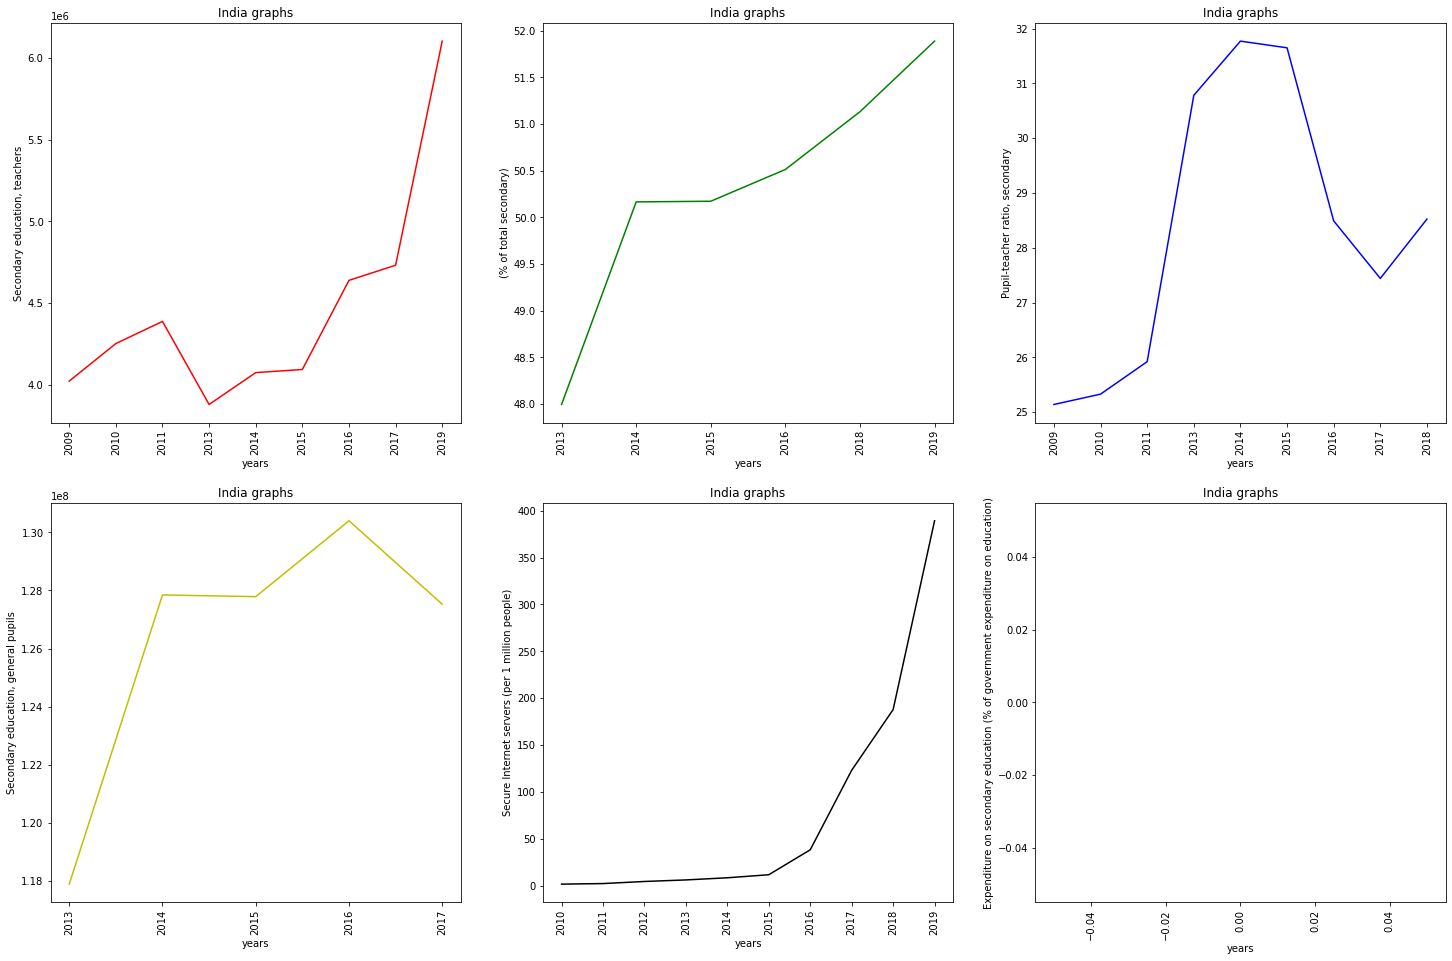

In [75]:
onecon(["IN"],"India graphs")

### From the above graph it can be seen that the number of students enrolling in private school is increasing, teacher student ratio has been decreased ,and the internet conectivity has been increased.

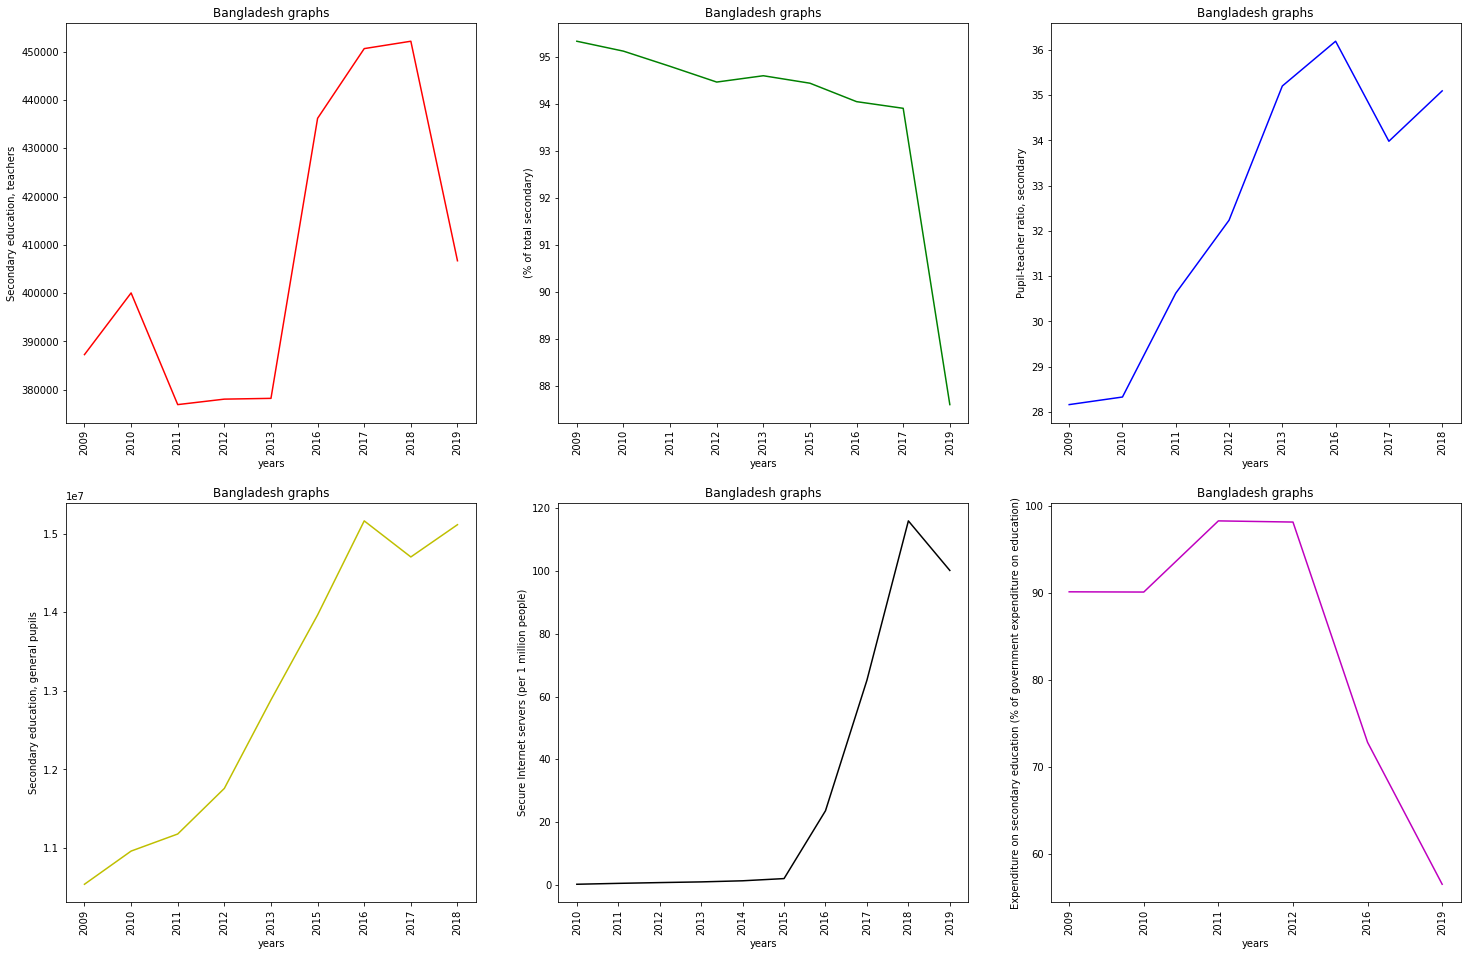

In [76]:
onecon(["BD"],"Bangladesh graphs")

## From the above graph it can be seen that the internet users has been increased, scondary education genral puupils has been increased, and ther also have been decrease in secondary teacher ratio.

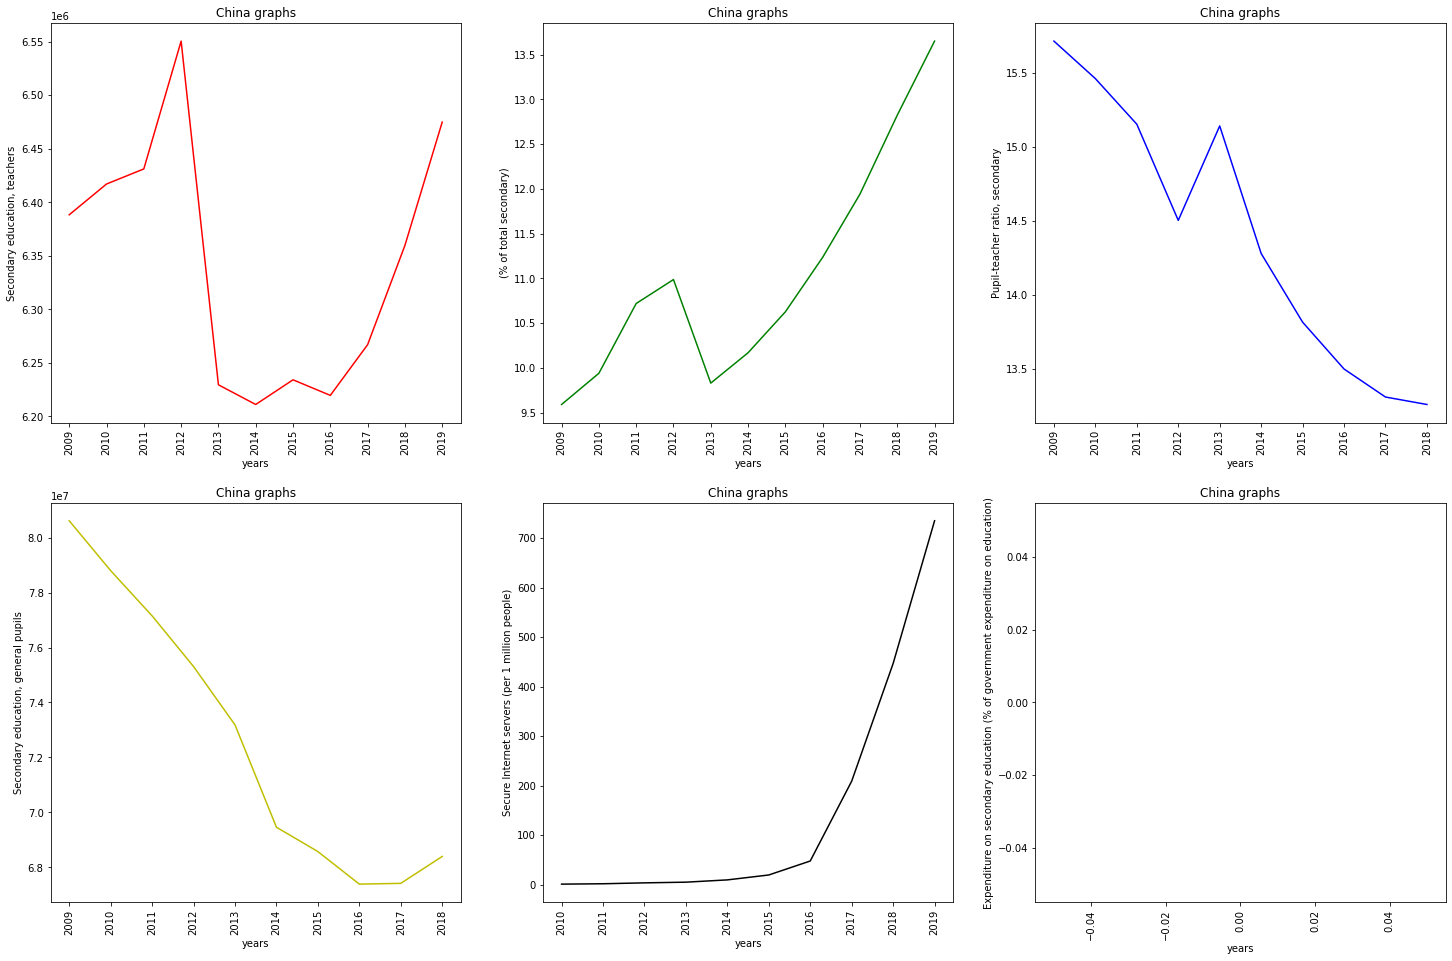

In [100]:
onecon(["CN"],"China graphs")

## it can be seen that the private school enrolment has been increased and the internet acces but the teachers to pupil ratio  have been reducued.

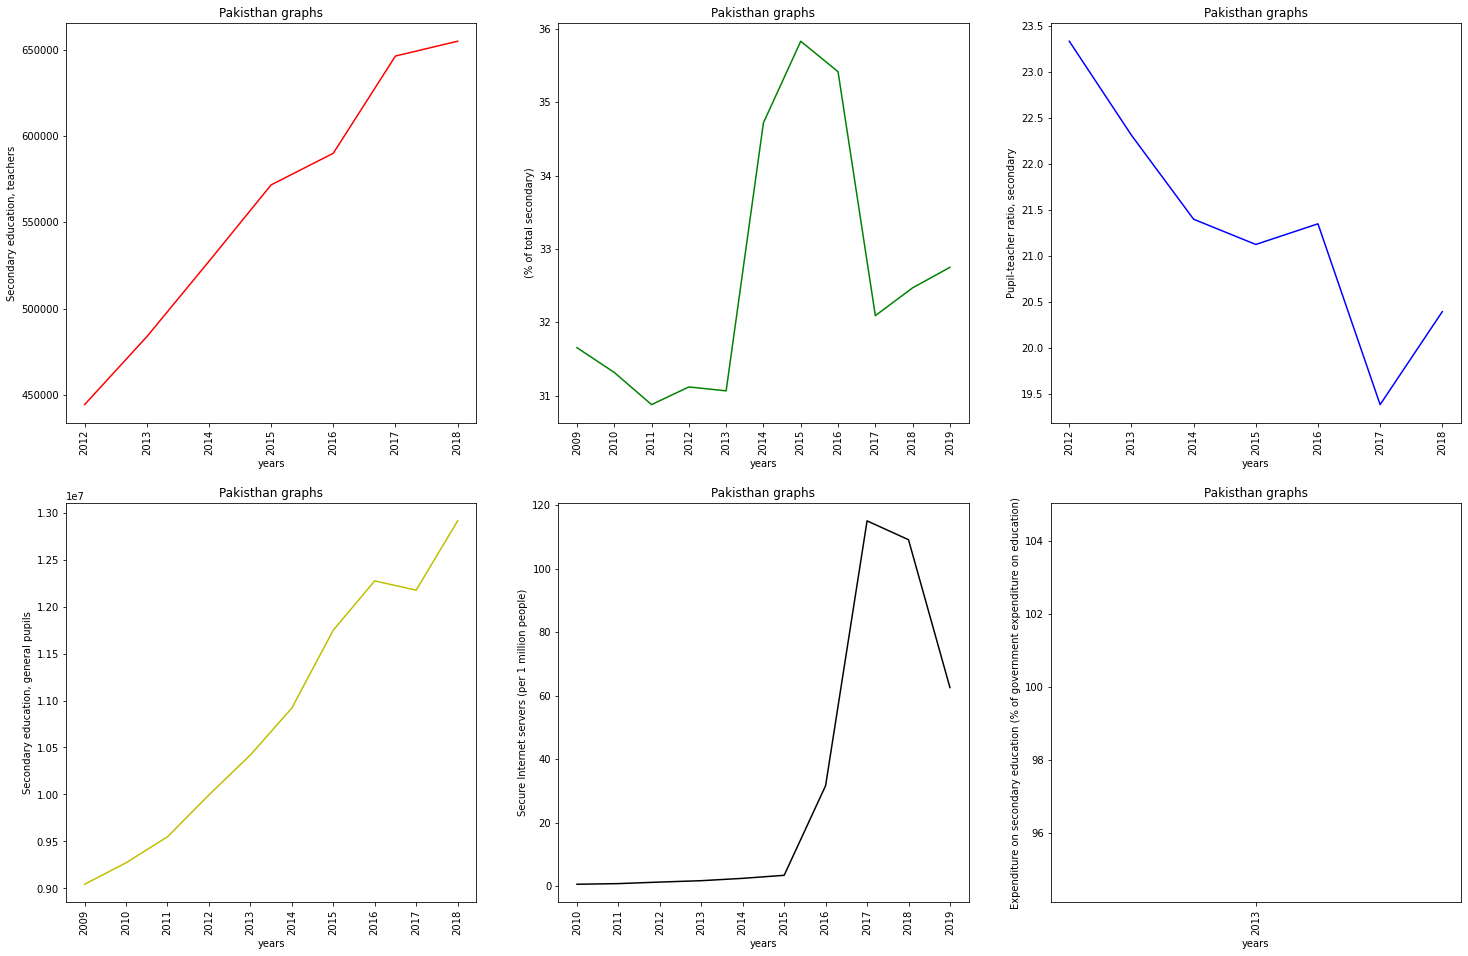

In [78]:
onecon(["PK"],"Pakisthan graphs")

## it can be seen that the secondary education genral pupuils enrollment has been increased the internet acces also been increased and the teacher to student ratio is very low.

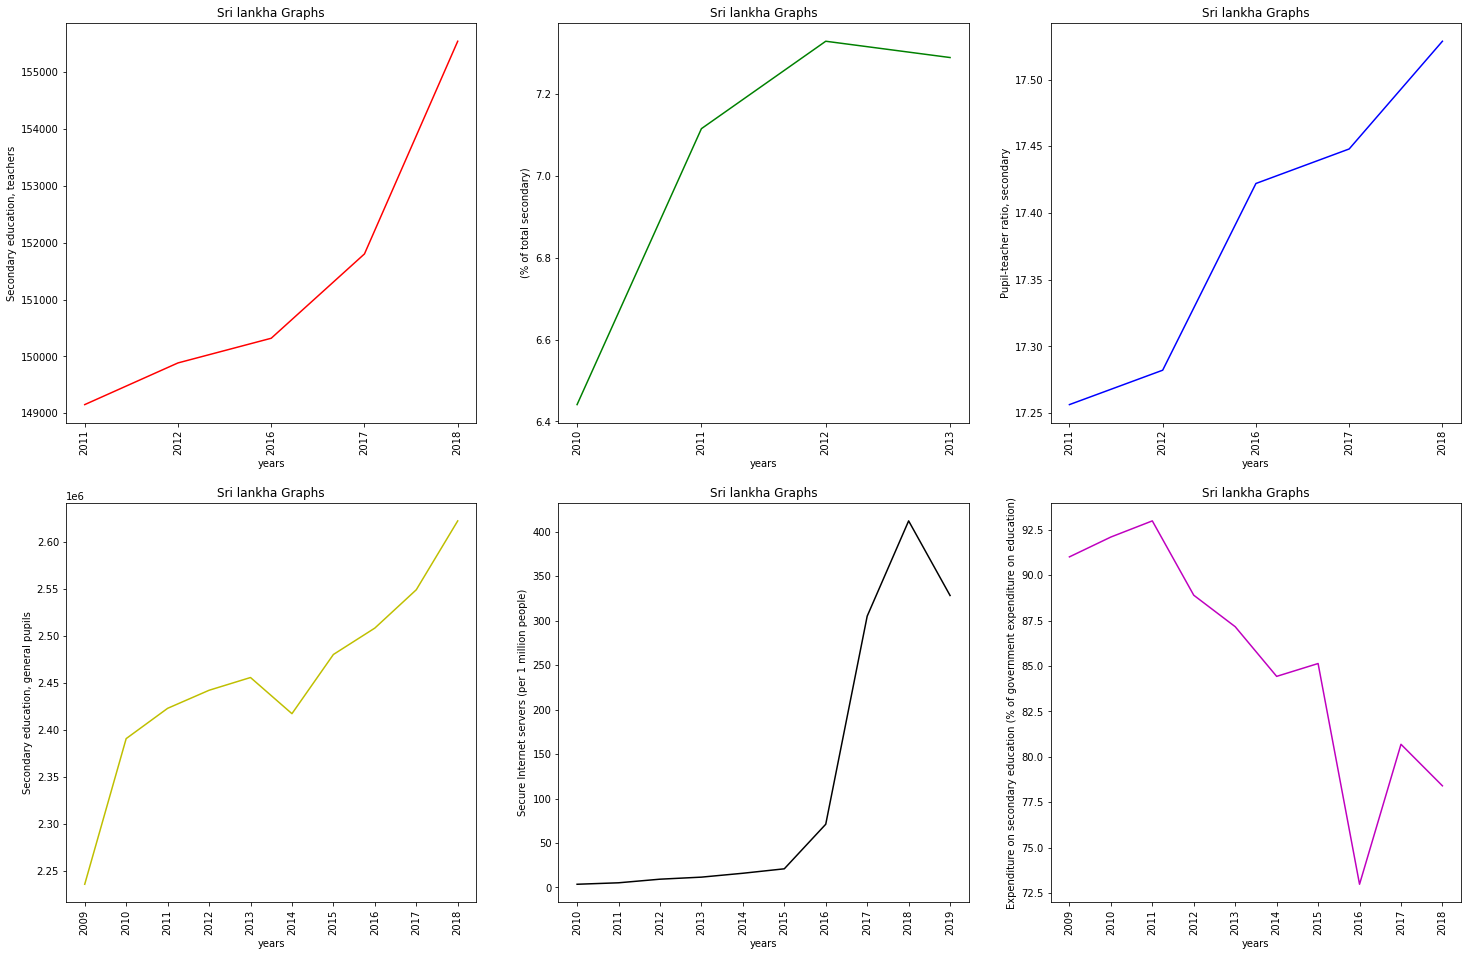

In [83]:
onecon(['LK'],"Sri lankha Graphs")

## it can be seen that the internet users have increased secondary education genral pupil has found and increase and even the private school enrollment has been increased.

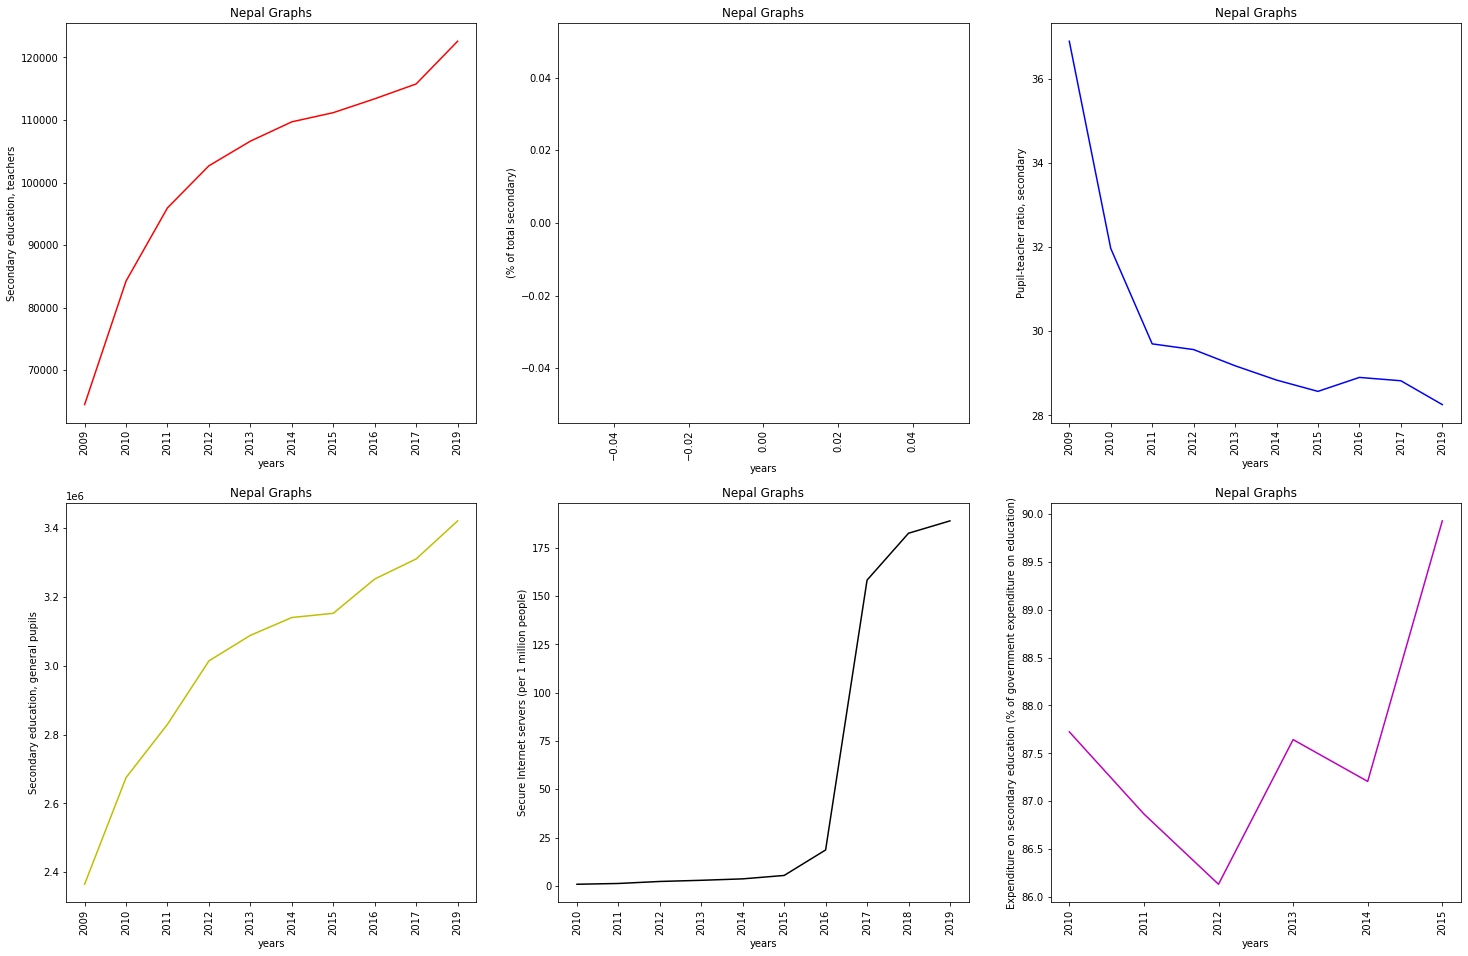

In [95]:
onecon(['NPL'],"Nepal Graphs")

## we can see that the internet user has been increased and the secondary education genral pupil enrollment has been increased and the student teacher ratio has been decreased

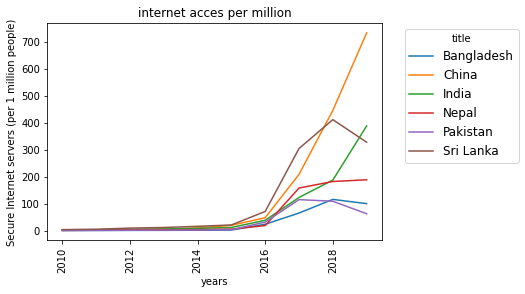

In [99]:
plot1(["IN",'BD','PK','NPL','LK','CN'],internet_ind,"internet acces per million")

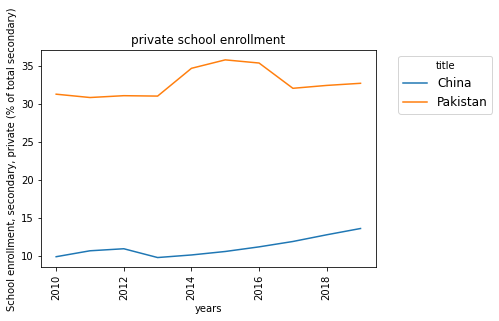

In [108]:
plot1(["PK",'CN'],private_enroll_ind,"private school enrollment")

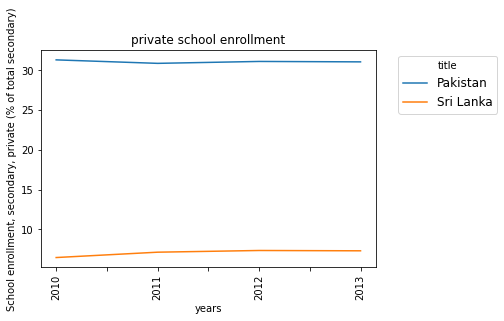

In [110]:
plot1(["PK",'LK'],private_enroll_ind,"private school enrollment")

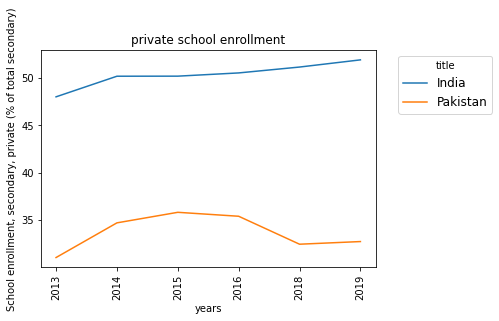

In [107]:
plot1(["PK",'IN'],private_enroll_ind,"private school enrollment")

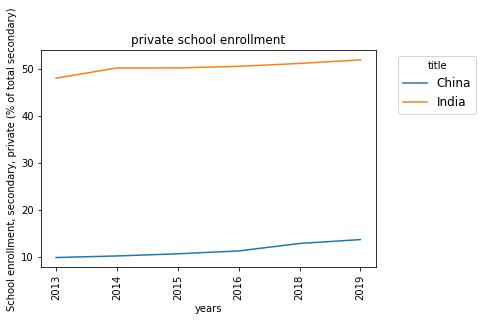

In [113]:
plot1(["CN",'IN'],private_enroll_ind,"private school enrollment")

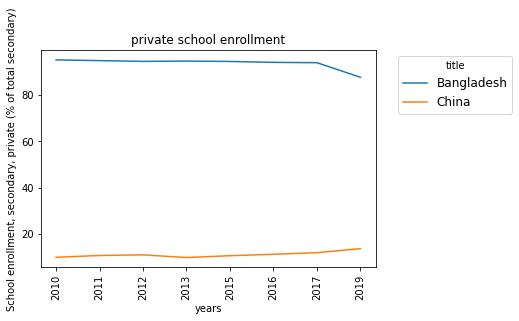

In [114]:
plot1(["CN",'BD'],private_enroll_ind,"private school enrollment")

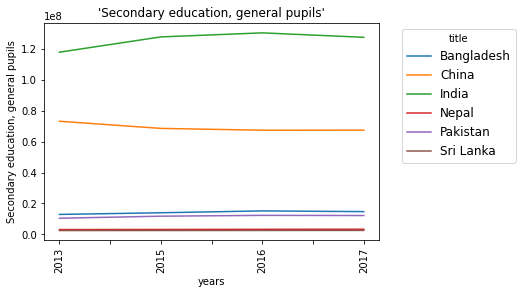

In [116]:
plot1(["IN",'BD','PK','NPL','LK','CN'],sec_ed_pupil_ind,"'Secondary education, general pupils'")

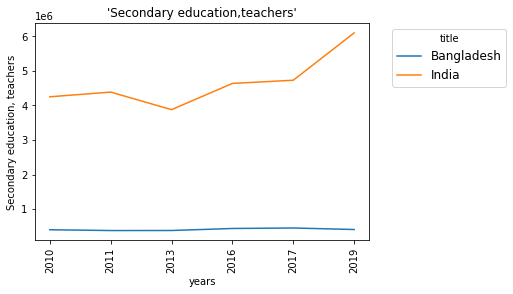

In [120]:
plot1(["IN",'BD',],sec_ed_techer_ind,"'Secondary education,teachers'")

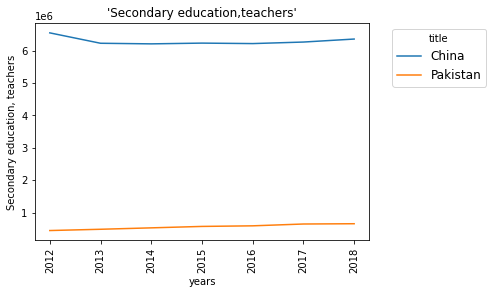

In [131]:
plot1(["PK",'CN',],sec_ed_techer_ind,"'Secondary education,teachers'")

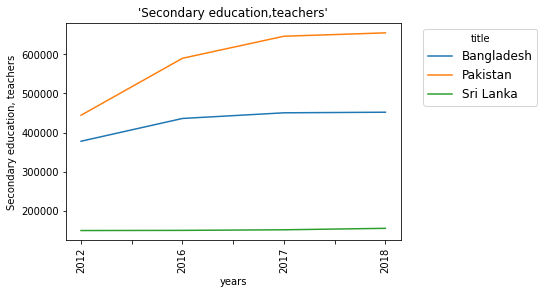

In [124]:
plot1(["LK",'PK','BD'],sec_ed_techer_ind,"'Secondary education,teachers'")

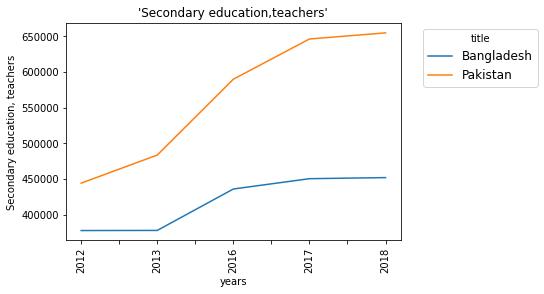

In [121]:
plot1(["PK",'BD',],sec_ed_techer_ind,"'Secondary education,teachers'")

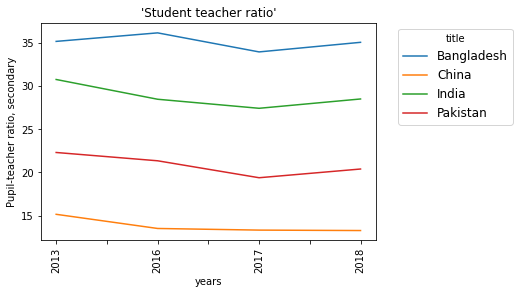

In [126]:
plot1(["IN",'BD','PK','CN'],pupil_teach_ratio_ind,"'Student teacher ratio'")

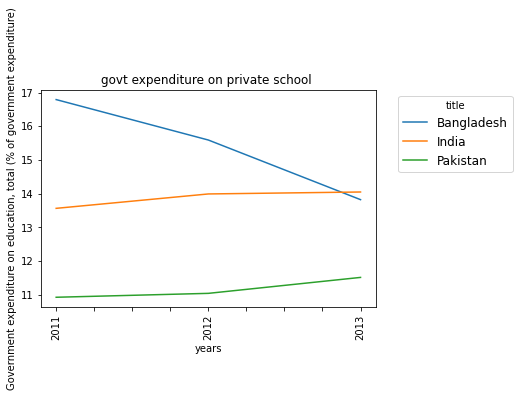

In [ ]:
plot1(["IN",'PK','BD'],govt_exp_ind,"govt expenditure on private school ")

# From the above exploration we can notes that after considering some of the major feature like internet and other sub features we can say in asia the best countries would be bangladesh ,china and india.

#America
usa, Brazil,cuba,coloumbia,Argentina.

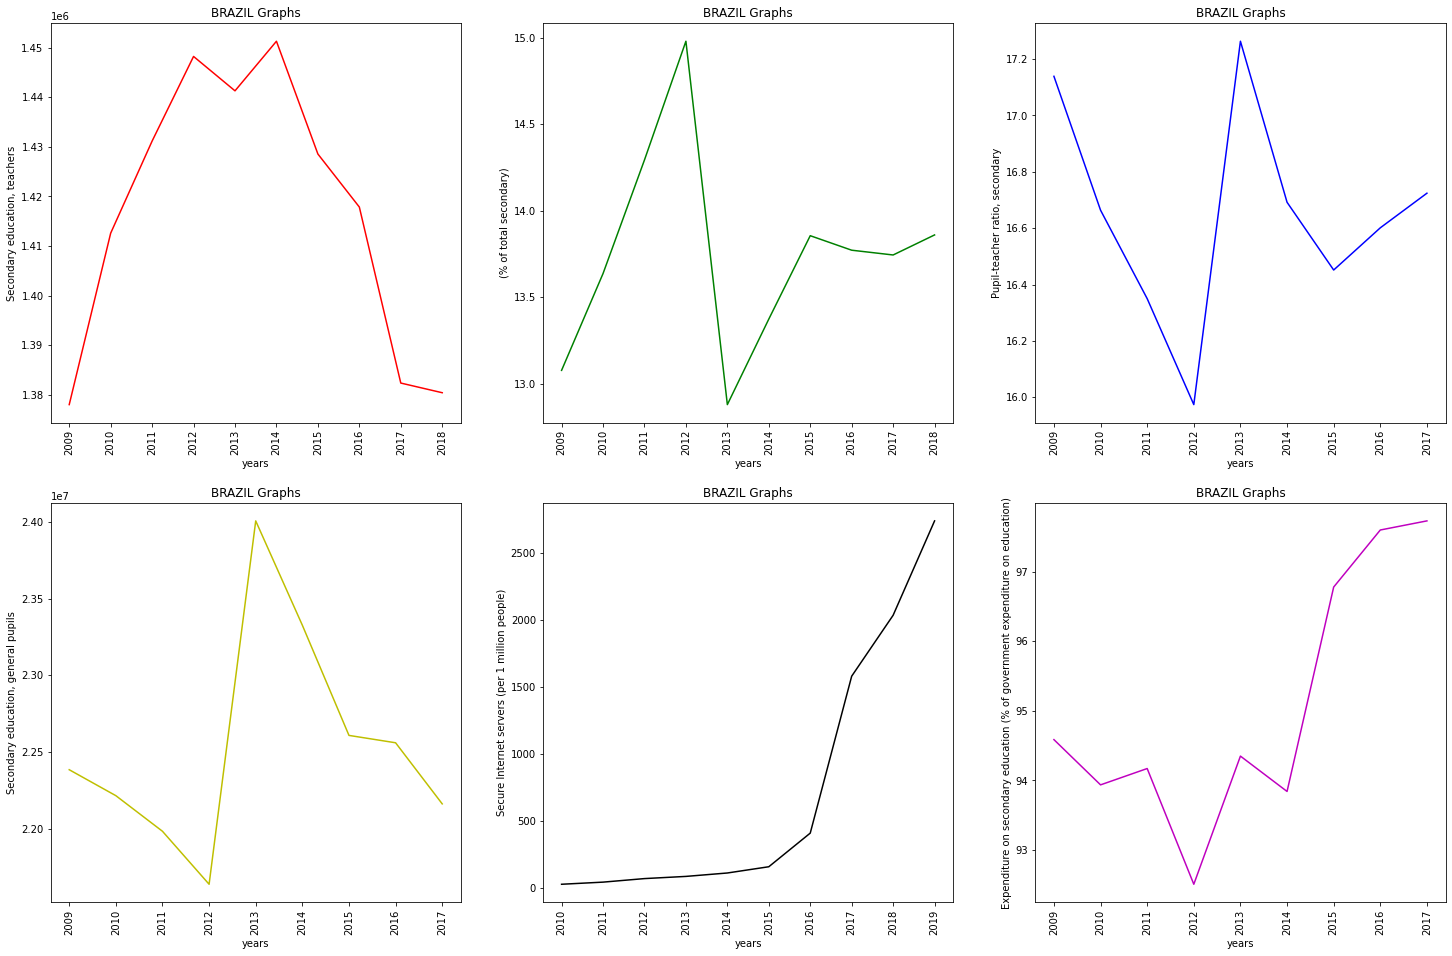

In [ ]:
onecon(['BR'],"BRAZIL Graphs")

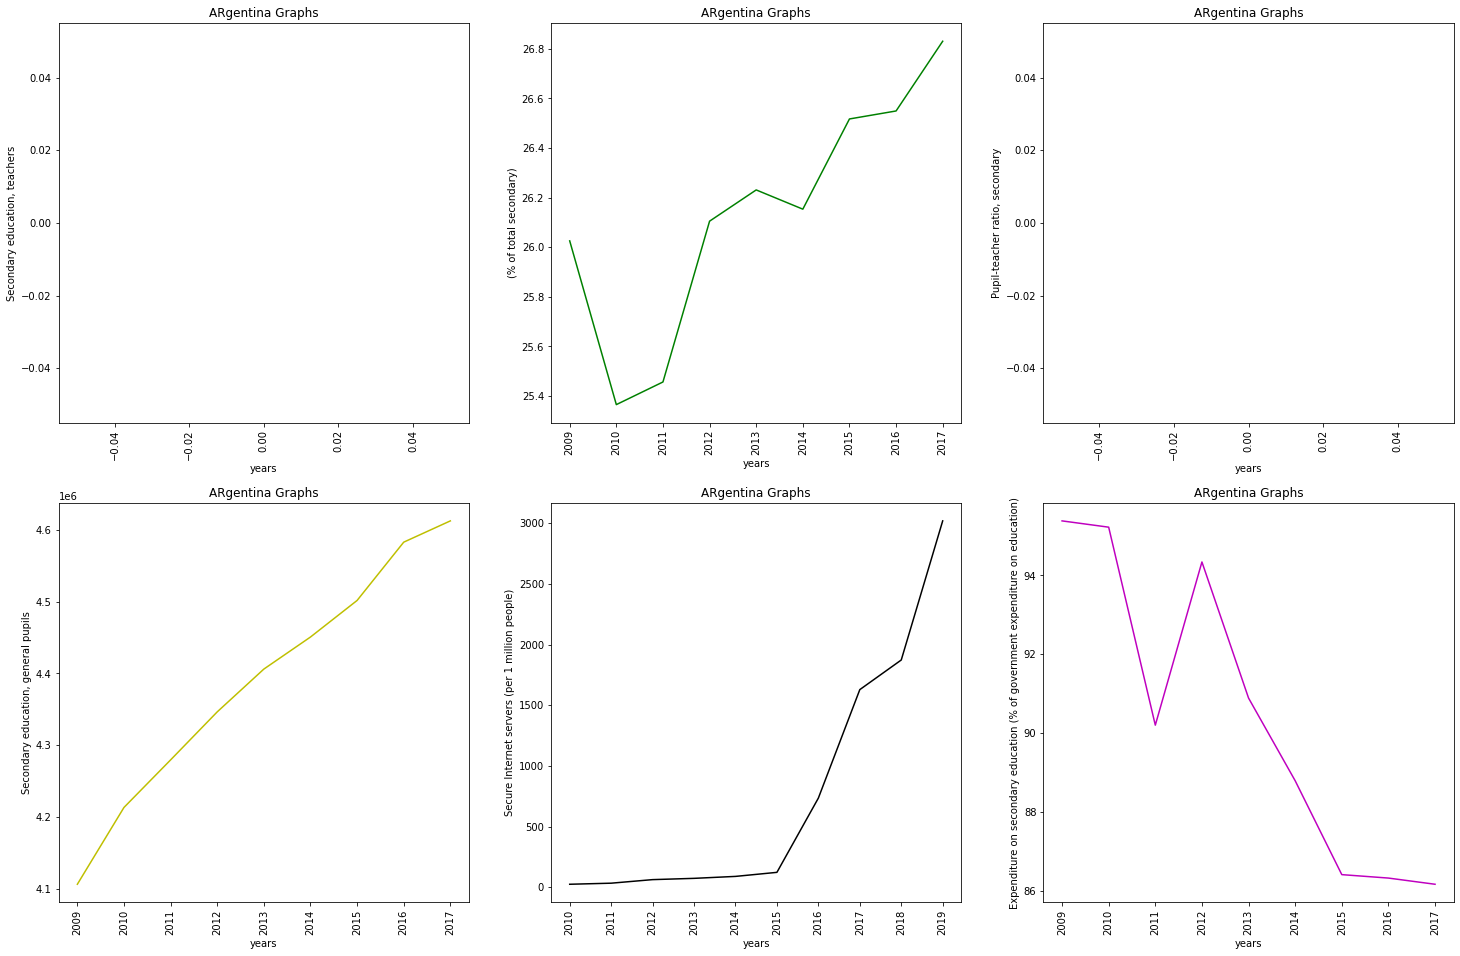

In [134]:
onecon(['AR'],"ARgentina Graphs")

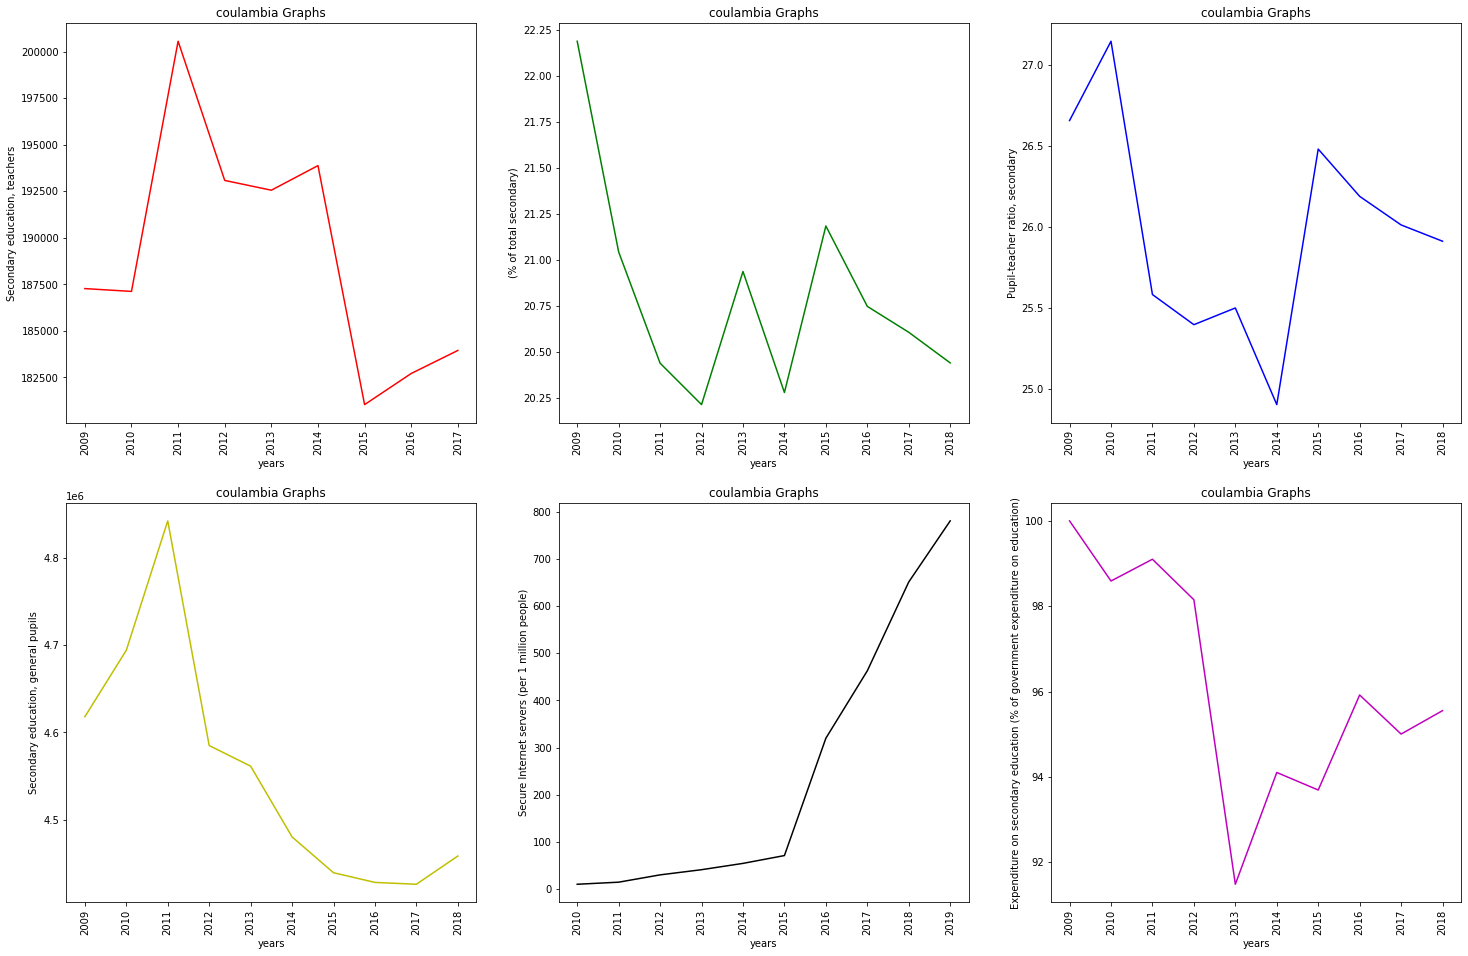

In [133]:
onecon(['CO'],"coulambia Graphs")

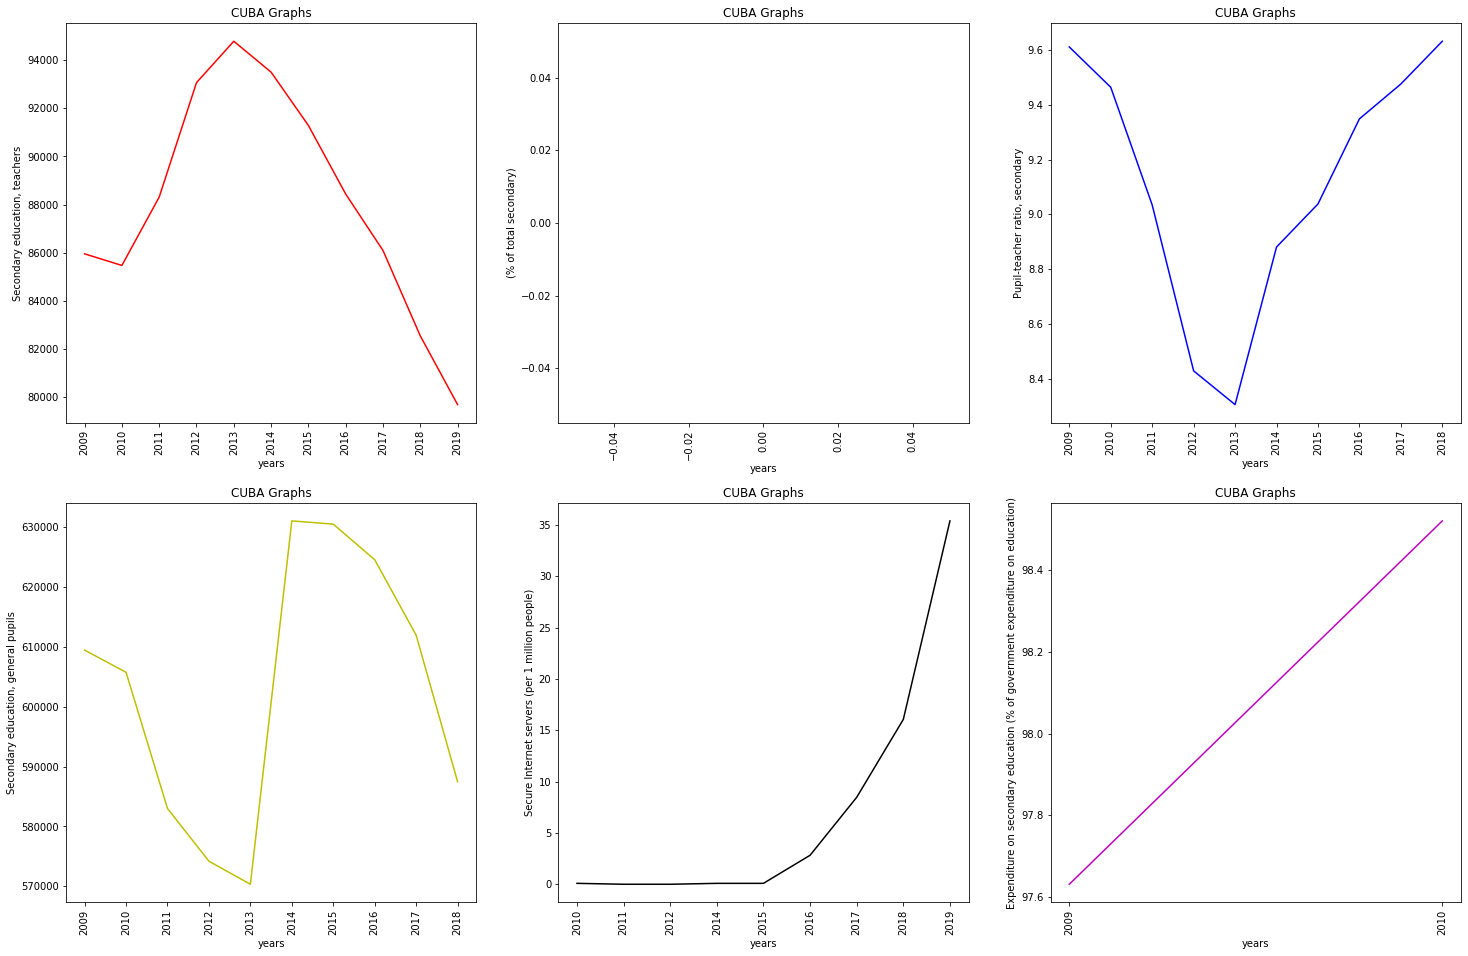

In [132]:
onecon(['CU'],"CUBA Graphs")

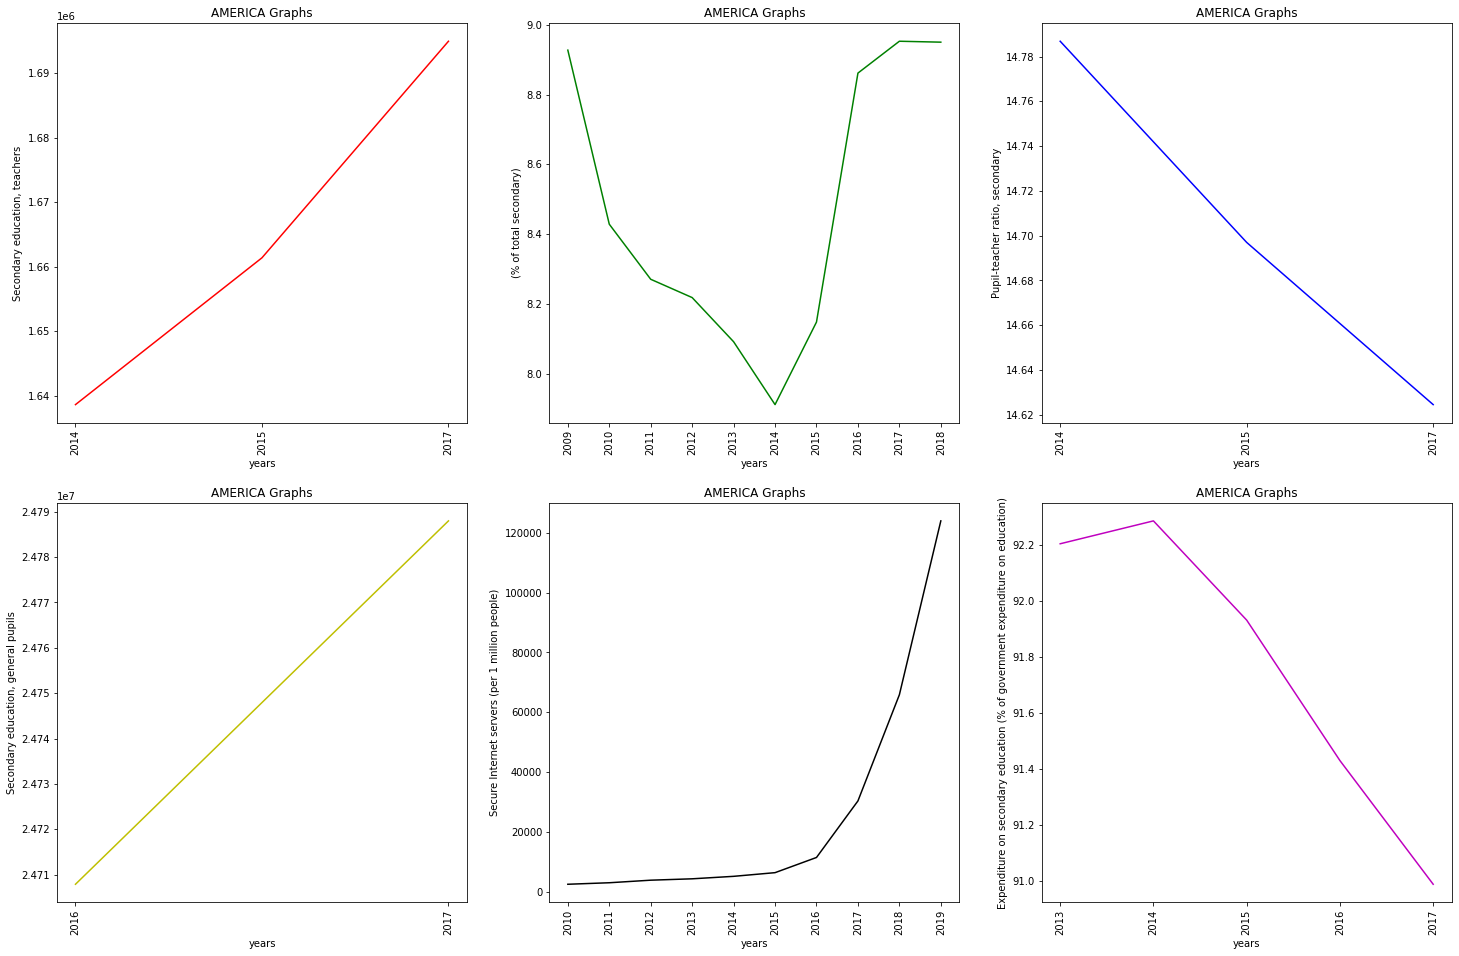

In [ ]:
onecon(['US'],"AMERICA Graphs")

## From the above graphs we can choose USA Brazil and Colombia for further exploration 

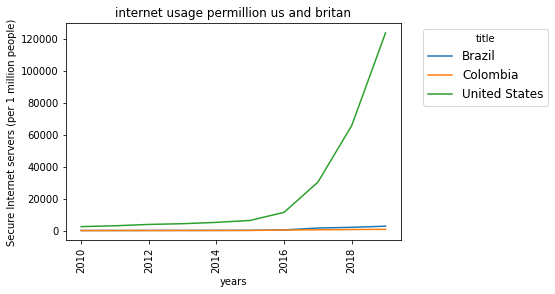

In [135]:
plot1(['BR','CO','US'],internet_ind,"internet usage permillion us and britan")

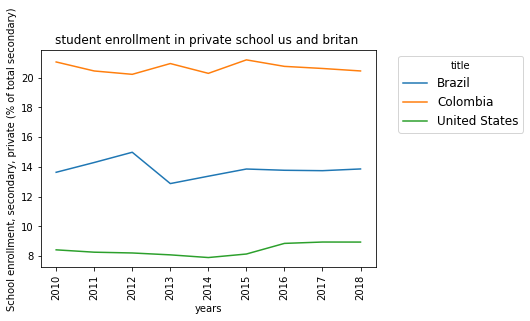

In [136]:
plot1(['BR','CO','US'],private_enroll_ind,"student enrollment in private school us and britan ")

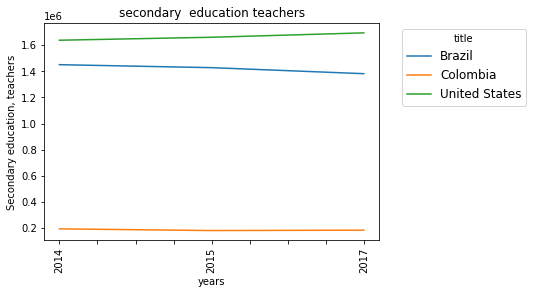

In [138]:
plot1(['BR','CO','US'],sec_ed_techer_ind,"secondary  education teachers")

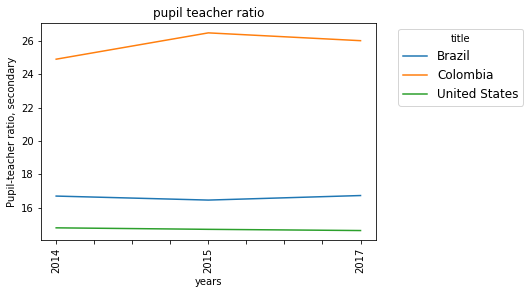

In [141]:
plot1(['BR','CO','US'],pupil_teach_ratio_ind,"pupil teacher ratio")

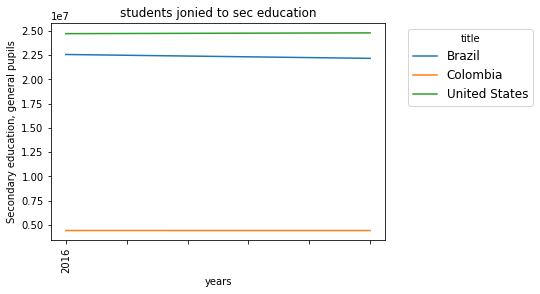

In [140]:
plot1(['BR','CO','US'],sec_ed_pupil_ind,"students jonied to sec education")

## From the above exploration it can been seen that barzil and USA

#Europe
Germany,France,Ukraine,Irleand,poland,Finland,UK.

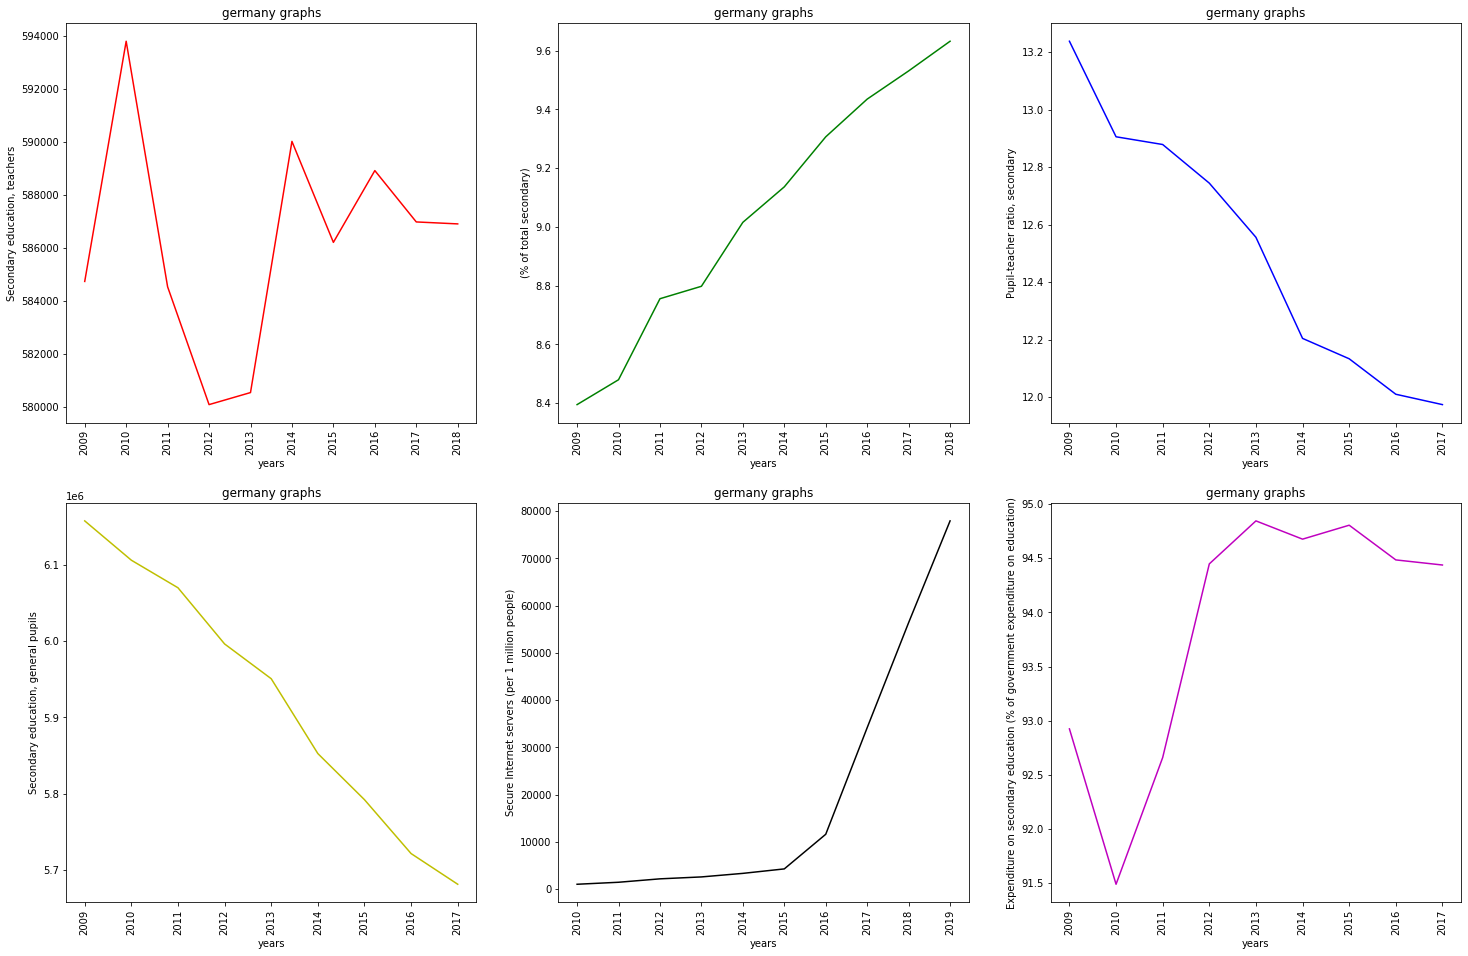

In [145]:
onecon(['DE'],'germany graphs')

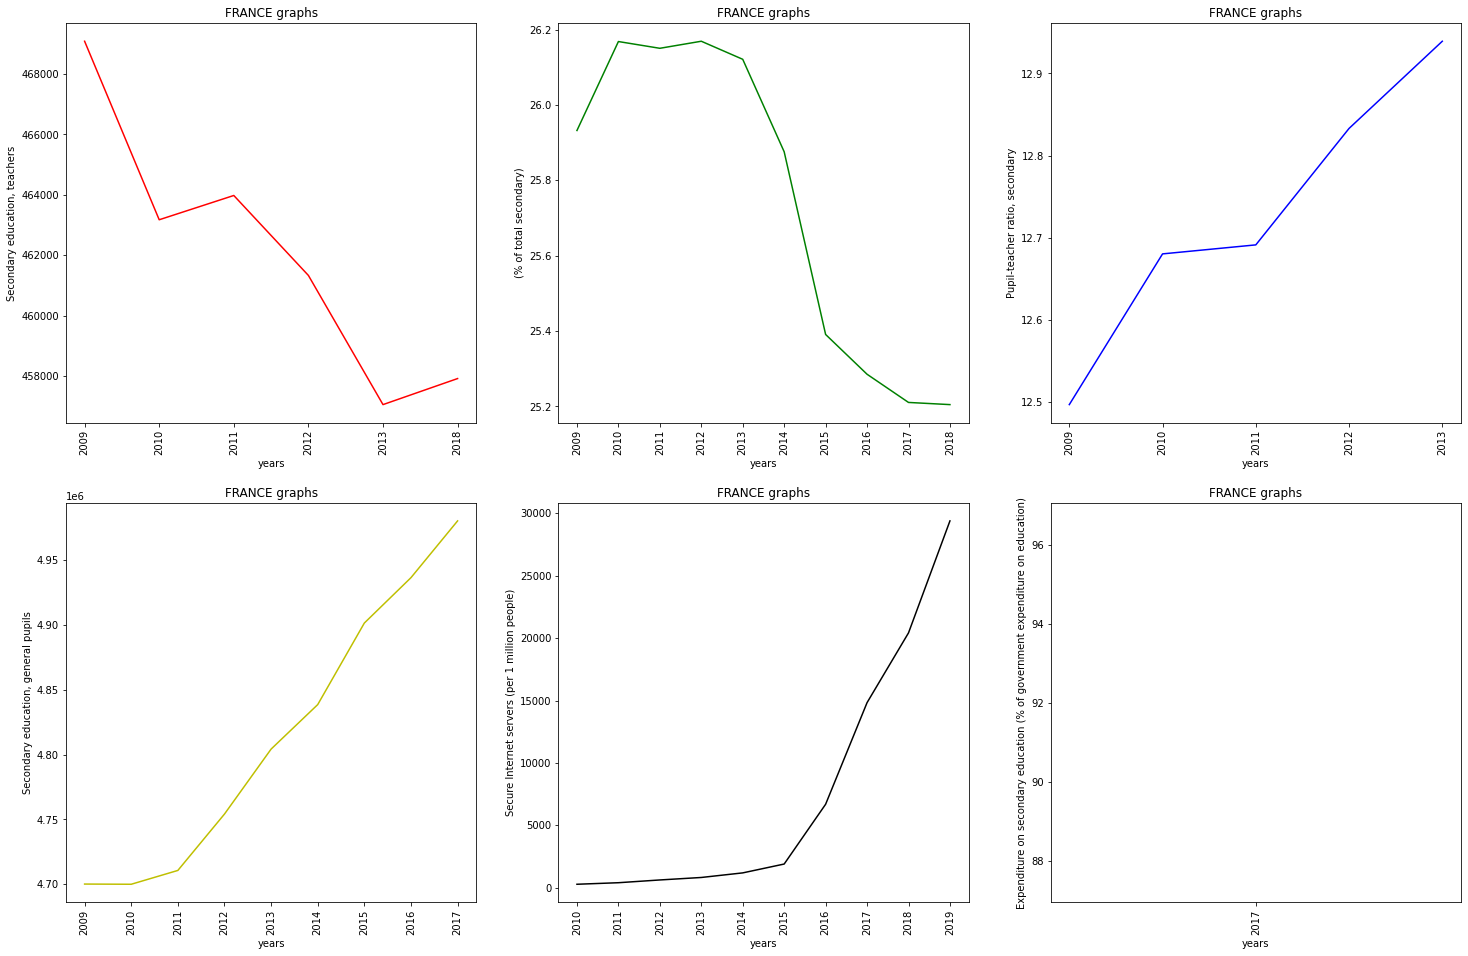

In [146]:
onecon(['FR'],'FRANCE graphs')

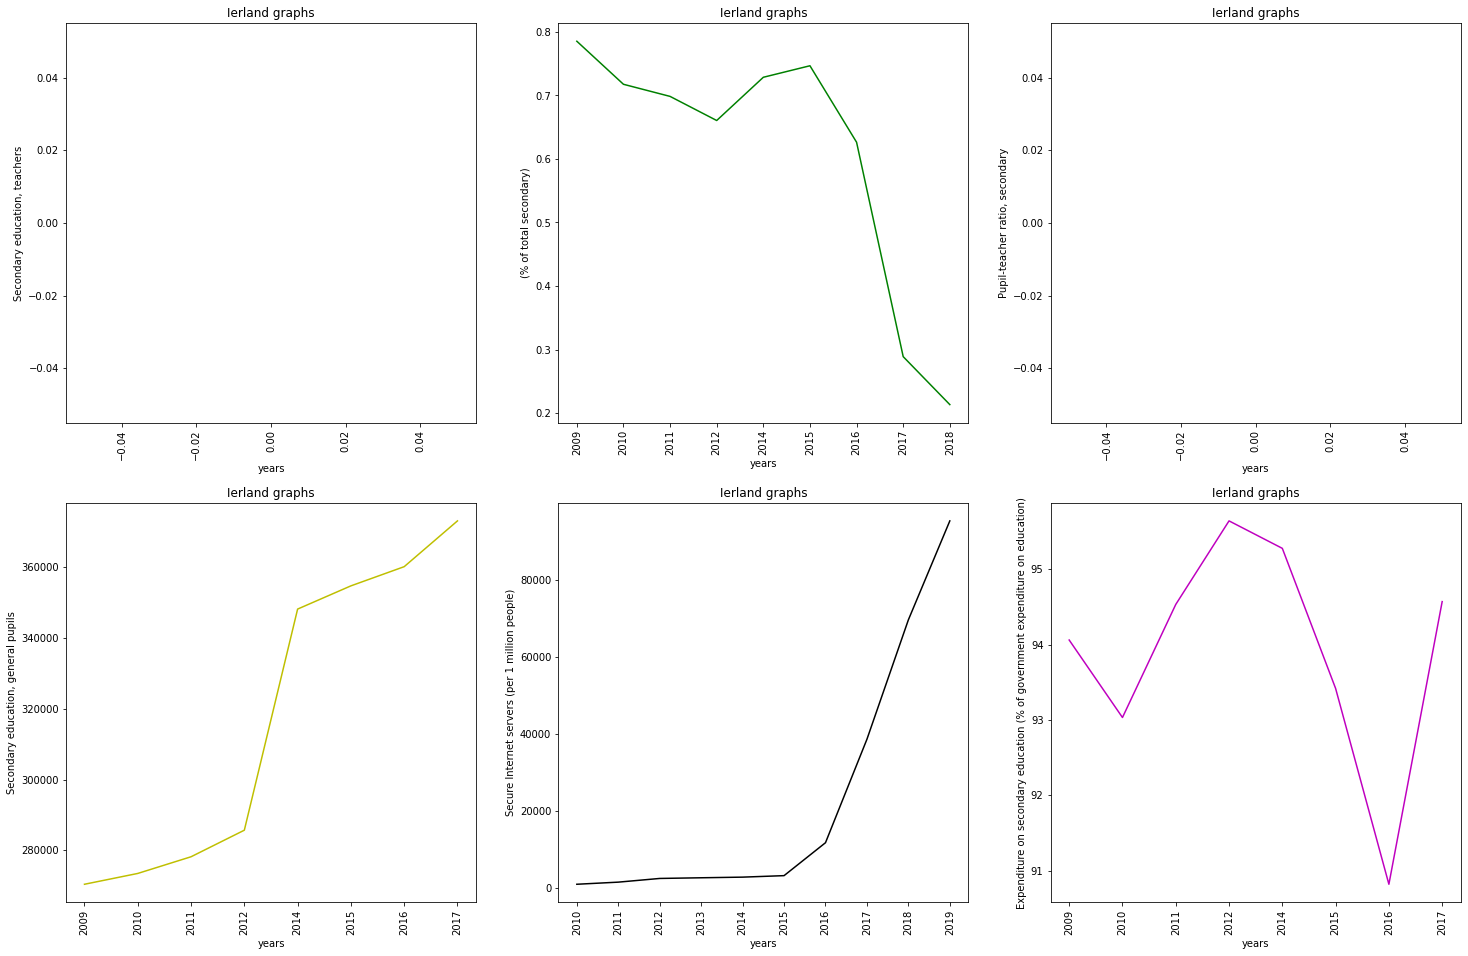

In [147]:
onecon(['IE'],'Ierland graphs')

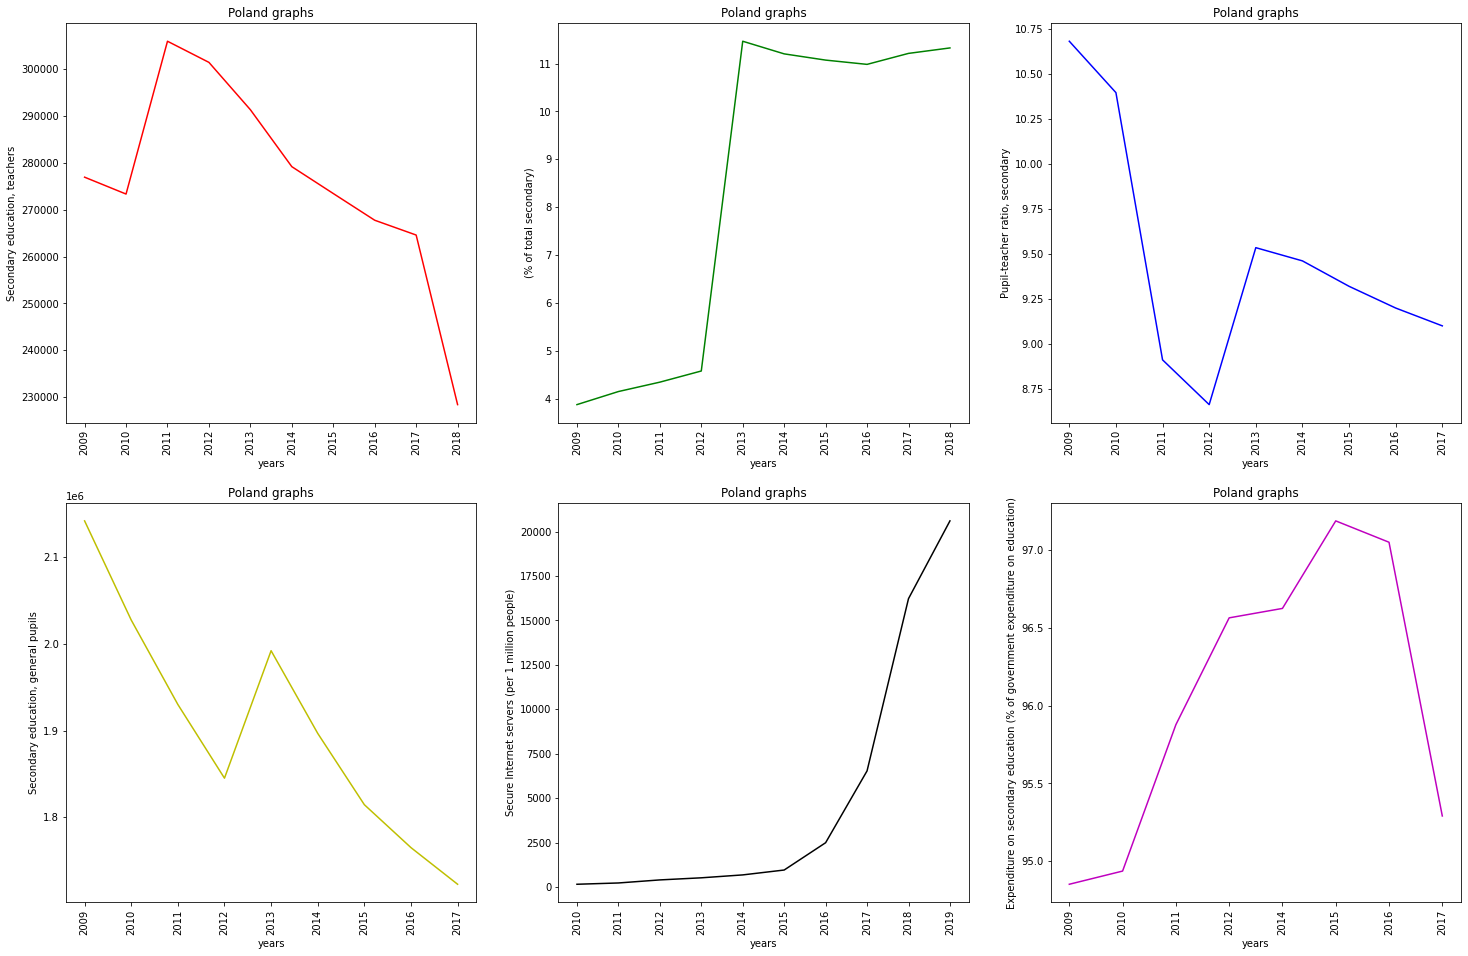

In [148]:
onecon(['PL'],'Poland graphs')

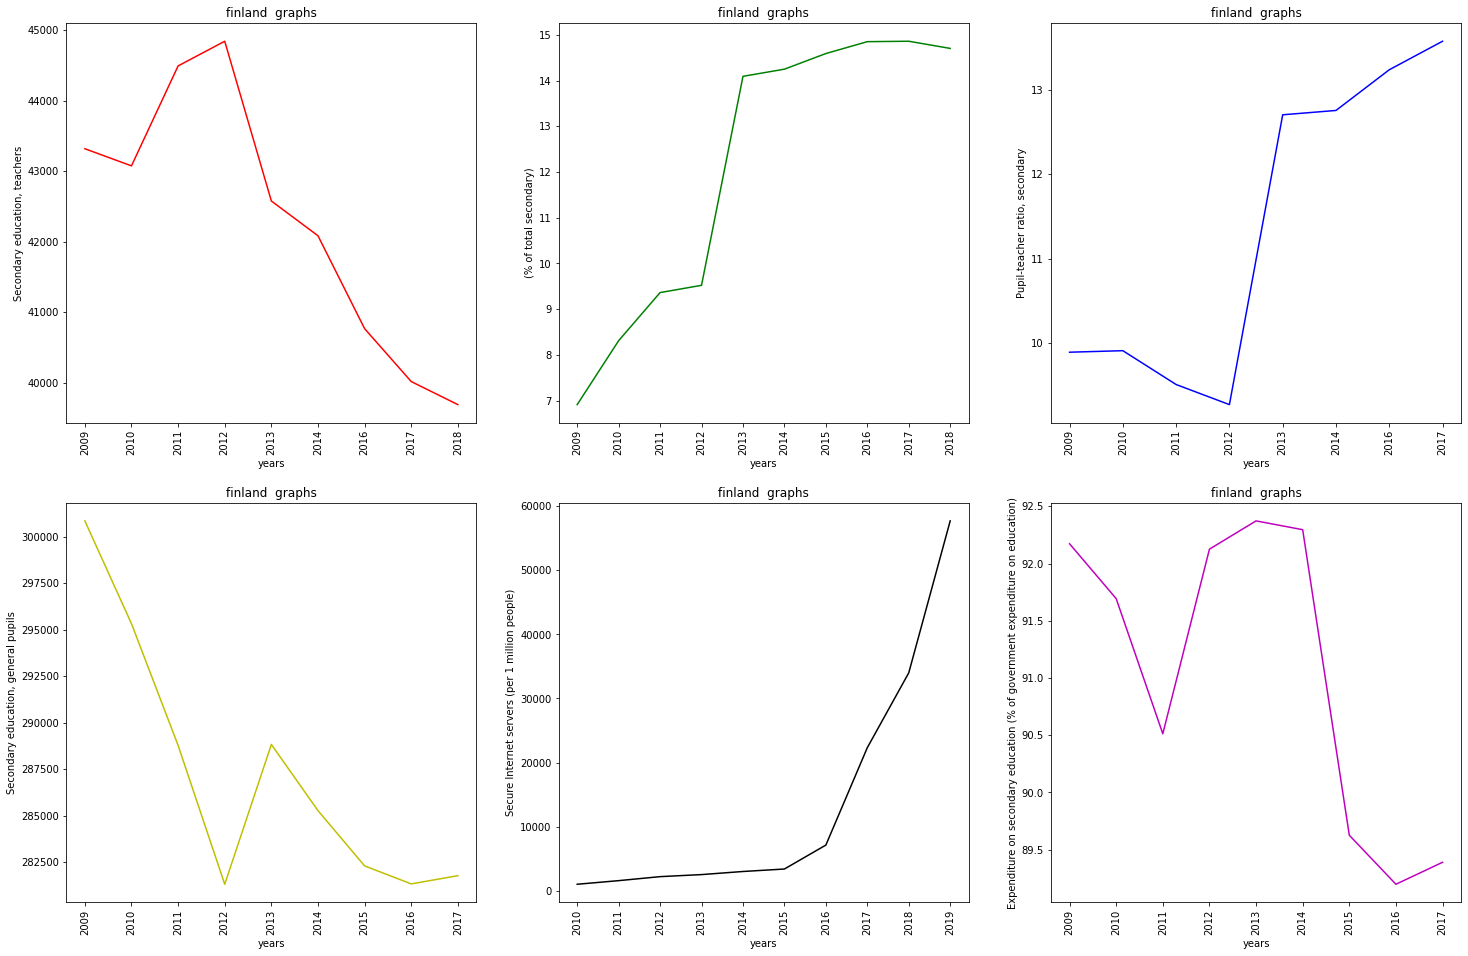

In [149]:
onecon(['FI'],'finland  graphs')

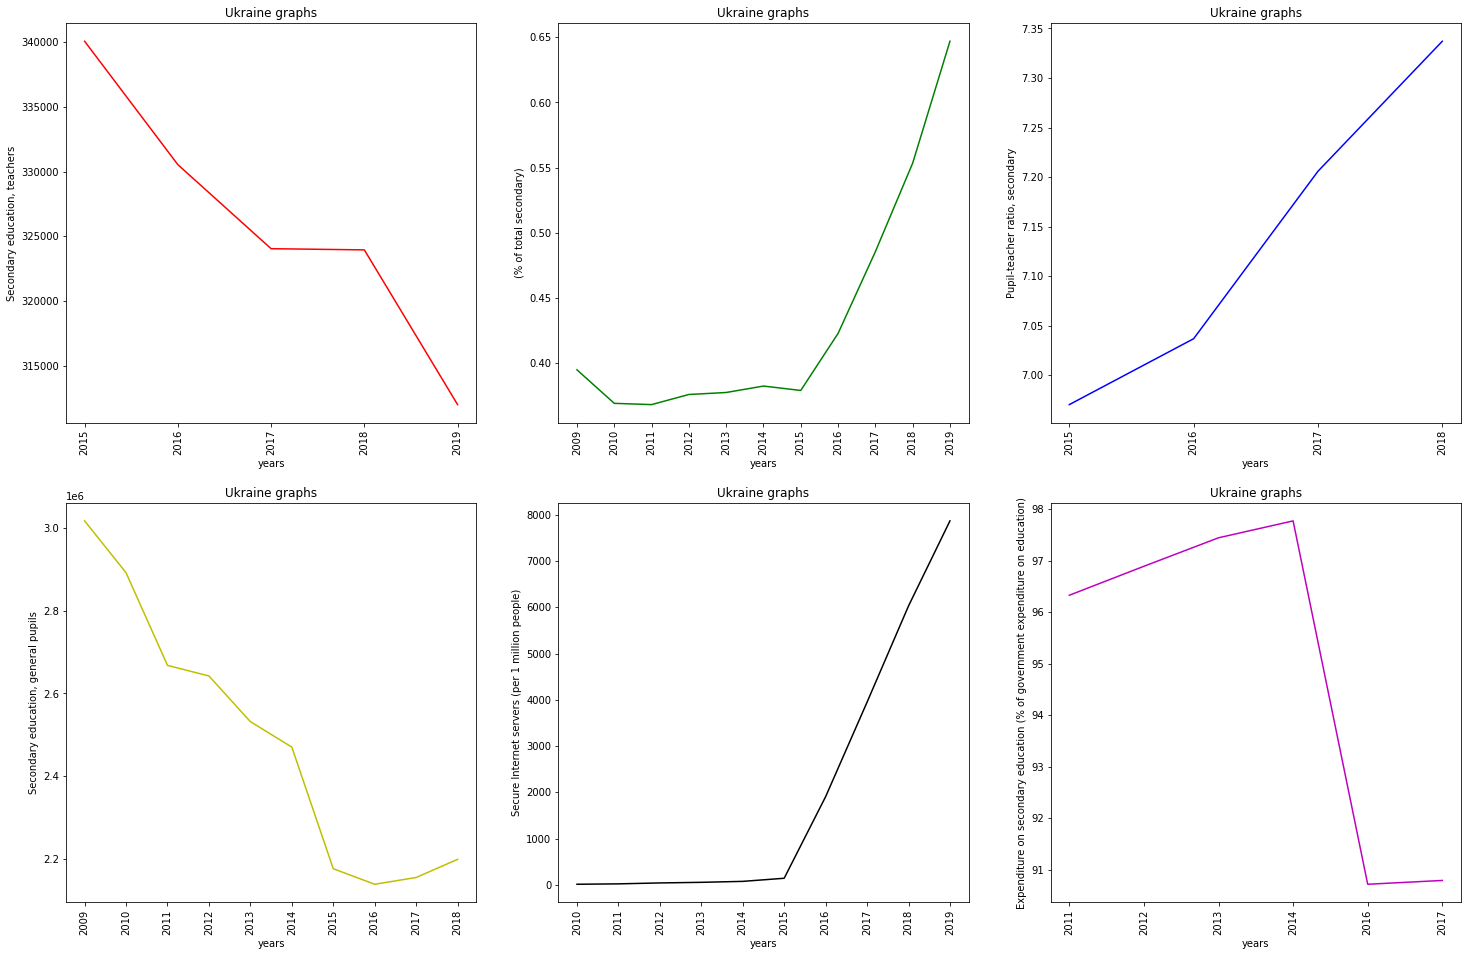

In [150]:
onecon(['UA'],'Ukraine graphs')

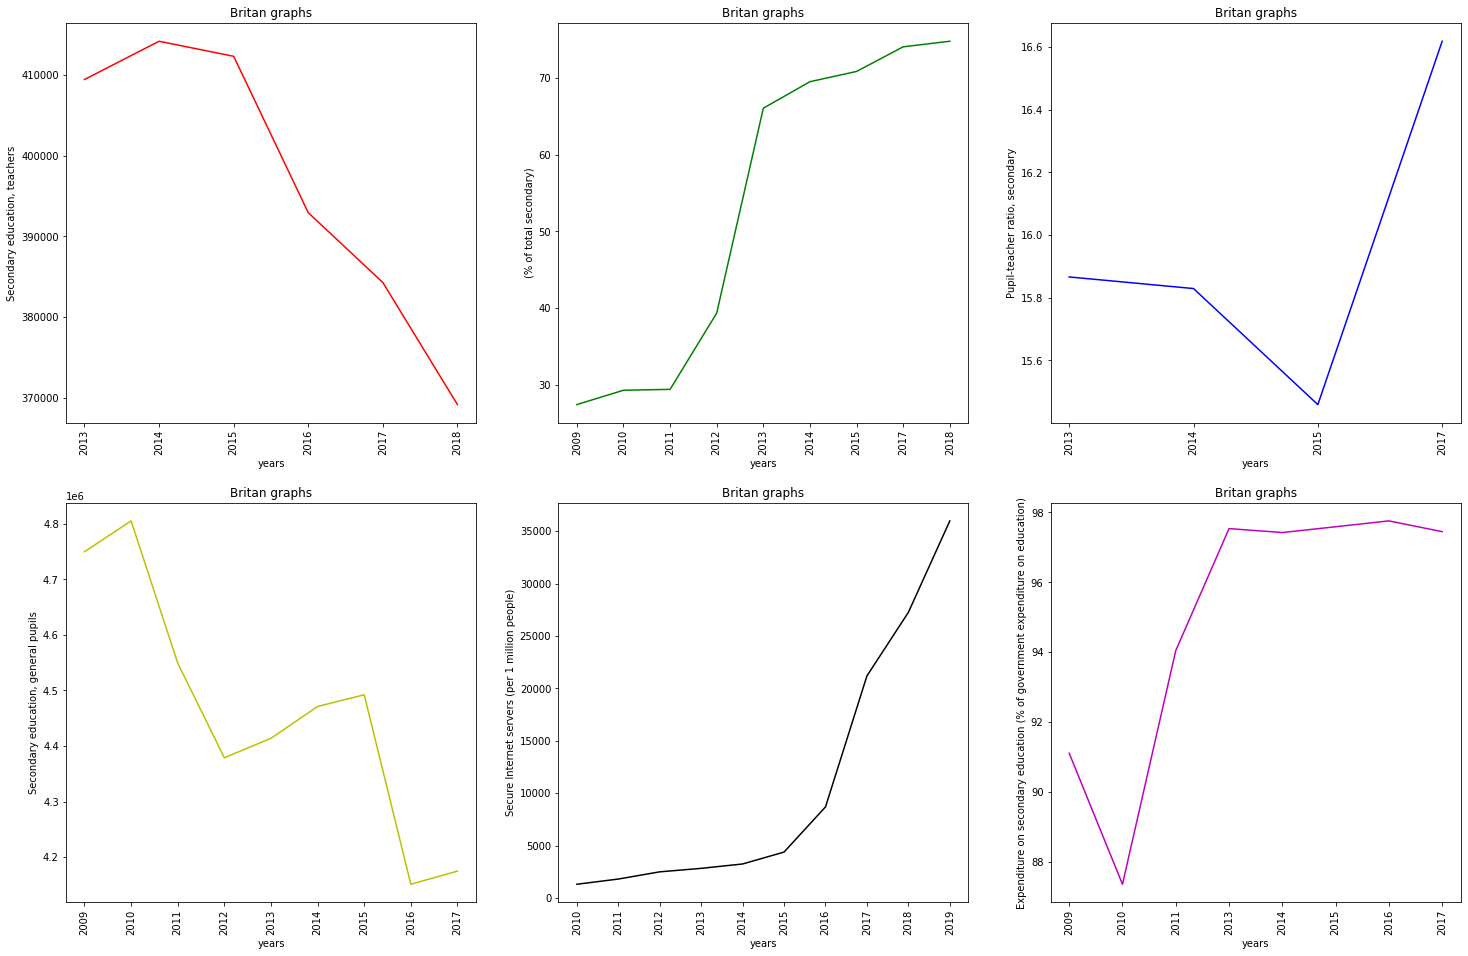

In [144]:
onecon(['GB'],'Britan graphs')

# from the above graphs we can see that number of people enrolling to secondary education has been decreased but based ont he other features some of the best countries in europe would be polland , britan and finland